### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Assignment: COVID-19 data

## Note
The Jupyter Notebook is prepared following the template provided. This notebook follows the assignment activity during each week with an additional code and Markdown if necessary. Comments are also included as part of the process.

A separate report is prepared and submitted to only include the key takeaways from the analysis activity. 

## 0) Environment preparation
These settings are provided for you. You do not need to make any changes.

In [1]:
# Import the required libraries and set the plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Format the data with thousand separator for easy reading
pd.options.display.float_format = '{:,.0f}'.format

In [3]:
# Set plotting options
sns.set(rc = {'figure.figsize':(15,10)})
sns.set_palette('pastel')
sns.set_style('whitegrid') 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
pd.options.display.max_colwidth = 200

### Required: My Github Repo
- [My Github Repo](https://github.com/katiechk/LSE_DA_COVID_analysis)

!['My Github screenshot](https://raw.githubusercontent.com/katiechk/LSE_DA_COVID_analysis/main/github%20profile%20screenshot.png?token=GHSAT0AAAAAABVEEPTROGWWFZEQ4H7IM57CYWUEZJA)

## 2) Assignment activity 2: Import and Explore the Data

### 2.1) Report expectations:
- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features.
- Identify missing data.
- Filter/subset data.
- Aggregate data (totals and by month).
- Note observations.

### 2.2) Presentation expectations:
Use the process of exploring the data for Gibraltar as an example to provide a brief description of the various phases to help your team to understand the process. Keep it high level and make sure to focus on both specifics relating to the case (first dose, second dose per region, total and over time) and brief observations regarding the process. Assignment activity 2 considers basic data exploration.
- Can we make decisions based on total numbers only, or do trends over time offer additional insights?
- Why it is important to explore the data, what are the typical mistakes made in this phase?

### Week 2 Notes and observations:
The total numbers provide a glimpse of the COVID-19 data to indicate the overview of the data recorded. Yet, it is unable to provide much insight because of the following reasons:

1. Part of the data recorded are cumulative data that the sum does not provide an actual picture of the data
2. There are missing data in the provided dataset that the total number is not the full representation of the period recorded
3. There is no clear indication for the stability of the data that if the data is collected consistently over time. 

With the concern listed above, it is important to review the data trends over time to offer additional insights. Based on the identified trend, we can recognize the unjustified part of the data that required further investigation. We can also discover the 2 spike for COVID-19 that is Dec 2020 and Jul 2021. We can distinguish a positive relevance between the Deaths, Cases, Hospitalised and Recovered.

The typical mistakes that are easily made in this phase is to review the data at a high level only and neglect the data detail.

In [4]:
# Import the csv files
cases = pd.read_csv('/Users/chanhiukiu/Documents/professional development/learning/lse data analytics career accelerator/course 2/assessment 2/LSE_DA201_Assignment_files/covid_19_uk_cases.csv')
vaccinated = pd.read_csv('/Users/chanhiukiu/Documents/professional development/learning/lse data analytics career accelerator/course 2/assessment 2/LSE_DA201_Assignment_files/covid_19_uk_vaccinated.csv')
tweets = pd.read_csv('/Users/chanhiukiu/Documents/professional development/learning/lse data analytics career accelerator/course 2/assessment 2/LSE_DA201_Assignment_files/tweets.csv')

### Explore the cases dataframe:
- The cases dataframe is the daily entries that contain details of COVID cases in the United Kingdom, including the number of deaths, cases, recovered, and hospitalised cases in each of the provinces.
- Deaths and Cases are cumulative data as we can see the number increase over time. Hence, descriptive statistic does not provide much insight in this case
- The hospitalised data is the number of cases where COVID-19 positive individuals are hospitalised, yet it is worth to further explore and clarify given that the number of hospitalised could be higher than the number of cases that is absurd
- The cases dataframe have 7,584 rows and 12 columns with 2 rows of missing data
- The number of COVID-19 cases differs significantly from province to province due to the difference in population. Others are especially high as we expect it to cover the large number of population in the UK.

In [5]:
# View the cases dataframe
print(cases.shape)
print(cases.dtypes)

(7584, 12)
Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object


In [6]:
# View the cases dataframe first five rows
print(cases.head())

  Province/State  Country/Region  Lat  Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom   18   -63                      AIA   
1       Anguilla  United Kingdom   18   -63                      AIA   
2       Anguilla  United Kingdom   18   -63                      AIA   
3       Anguilla  United Kingdom   18   -63                      AIA   
4       Anguilla  United Kingdom   18   -63                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Deaths  Cases  Recovered  Hospitalised  
0       0      0          0             0  
1       0      0      

In [7]:
# View the cases dataframe last five rows
print(cases.tail())

     Province/State  Country/Region  Lat  Long ISO 3166-1 Alpha 3-Codes  \
7579         Others  United Kingdom   55    -3                      GBR   
7580         Others  United Kingdom   55    -3                      GBR   
7581         Others  United Kingdom   55    -3                      GBR   
7582         Others  United Kingdom   55    -3                      GBR   
7583         Others  United Kingdom   55    -3                      GBR   

      Sub-region Name  Intermediate Region Code        Date  Deaths     Cases  \
7579  Northern Europe                         0  2021-10-10 137,735 8,154,306   
7580  Northern Europe                         0  2021-10-11 137,763 8,193,769   
7581  Northern Europe                         0  2021-10-12 137,944 8,231,437   
7582  Northern Europe                         0  2021-10-13 138,080 8,272,883   
7583  Northern Europe                         0  2021-10-14 138,237 8,317,439   

      Recovered  Hospitalised  
7579          0           378 

In [8]:
# Count & view the cases dataframe missing values
print(cases.isnull().sum())
cases_null = cases[cases.isnull().any(axis = 1)]
cases_null

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
dtype: int64


Province/State  Country/Region  Lat  Long ISO 3166-1 Alpha 3-Codes  \
875        Bermuda  United Kingdom   32   -65                      BMU   
876        Bermuda  United Kingdom   32   -65                      BMU   

      Sub-region Name  Intermediate Region Code        Date  Deaths  Cases  \
875  Northern America                         0  2020-09-21     NaN    NaN   
876  Northern America                         0  2020-09-22     NaN    NaN   

     Recovered  Hospitalised  
875        NaN           NaN  
876        NaN           NaN

In [9]:
# View the descriptive statistic of cases dataframe
print(cases.describe())

        Lat  Long  Intermediate Region Code  Deaths     Cases  Recovered  \
count 7,584 7,584                     7,584   7,582     7,582      7,582   
mean     22   -41                        12   6,210   214,708        455   
std      28    31                        14  24,861 1,007,557      1,011   
min     -52   -81                         0       0         0          0   
25%      18   -65                         0       0        12          0   
50%      21   -61                         2       1       168         13   
75%      39    -5                        29      25     1,585        312   
max      55    -2                        29 138,237 8,317,439      8,322   

       Hospitalised  
count         7,582  
mean            685  
std             819  
min               0  
25%             105  
50%             390  
75%             956  
max           4,907  


### Explore the vaccinated dataframe:
- The vaccinated dataframe is the daily entries of vaccination in UK and it is not cumulative data
- The vaccinated dataframe have 7,584 rows and 11 columns with 0 rows of missing data
- Although the number of COVID-19 cases in Others differs significantly as it covers the large number of population in the UK, the vaccination number is similar with other province
- Vaccinated number is the same as Second Dose which indicate people who received Second Dose are considered to be fully vaccinated
- The desriptive statistic of vaccinated dataframe does not provide much insight either because the data entries before the vaccination launched were all recorded as 0

In [10]:
# View the vaccinated dataframe
print(vaccinated.shape)
print(vaccinated.dtypes)

(7584, 11)
Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object


In [11]:
# View the vaccinated dataframe first 5 rows
print(vaccinated.head())

  Province/State  Country/Region  Lat  Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom   18   -63                      AIA   
1       Anguilla  United Kingdom   18   -63                      AIA   
2       Anguilla  United Kingdom   18   -63                      AIA   
3       Anguilla  United Kingdom   18   -63                      AIA   
4       Anguilla  United Kingdom   18   -63                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Vaccinated  First Dose  Second Dose  
0           0           0            0  
1           0           0   

In [12]:
# View the vaccinated dataframe last 5 rows
print(vaccinated.tail())

     Province/State  Country/Region  Lat  Long ISO 3166-1 Alpha 3-Codes  \
7579         Others  United Kingdom   55    -3                      GBR   
7580         Others  United Kingdom   55    -3                      GBR   
7581         Others  United Kingdom   55    -3                      GBR   
7582         Others  United Kingdom   55    -3                      GBR   
7583         Others  United Kingdom   55    -3                      GBR   

      Sub-region Name  Intermediate Region Code        Date  Vaccinated  \
7579  Northern Europe                         0  2021-10-10        1070   
7580  Northern Europe                         0  2021-10-11        1300   
7581  Northern Europe                         0  2021-10-12        1482   
7582  Northern Europe                         0  2021-10-13           0   
7583  Northern Europe                         0  2021-10-14           0   

      First Dose  Second Dose  
7579        1216         1070  
7580        1604         1300  
75

In [13]:
# Count & view the vaccinated dataframe missing values
print(vaccinated.isnull().sum())
vaccinated_null = vaccinated[vaccinated.isnull().any(axis = 1)]
vaccinated_null

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64


Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, ISO 3166-1 Alpha 3-Codes, Sub-region Name, Intermediate Region Code, Date, Vaccinated, First Dose, Second Dose]
Index: []

In [14]:
# View the descriptive statistic of vaccinated dataframe
print(vaccinated.describe())

        Lat  Long  Intermediate Region Code  Vaccinated  First Dose  \
count 7,584 7,584                     7,584       7,584       7,584   
mean     22   -41                        12       5,914       6,193   
std      28    31                        14      10,846      11,440   
min     -52   -81                         0           0           0   
25%      18   -65                         0           0           0   
50%      21   -61                         2           0           0   
75%      39    -5                        29       8,338       7,506   
max      55    -2                        29      69,619      94,038   

       Second Dose  
count        7,584  
mean         5,914  
std         10,846  
min              0  
25%              0  
50%              0  
75%          8,338  
max         69,619  


In [15]:
# Format the data with thousand separator for easy reading
vaccinated['First Dose']= vaccinated['First Dose'].astype(float)
vaccinated['Second Dose']= vaccinated['Second Dose'].astype(float)
vaccinated['Vaccinated']= vaccinated['Vaccinated'].astype(float)

# Review the vaccinated dataframe by Province/State
vac_province = vaccinated.groupby(['Province/State'])['First Dose','Second Dose','Vaccinated'].agg('sum')

vac_province = vac_province.reset_index()
vac_province

Province/State  First Dose  Second Dose  \
0                                       Anguilla   4,931,470    4,709,072   
1                                        Bermuda   2,817,981    2,690,908   
2                         British Virgin Islands   5,166,303    4,933,315   
3                                 Cayman Islands   3,522,476    3,363,624   
4                                Channel Islands   3,287,646    3,139,385   
5                    Falkland Islands (Malvinas)   3,757,307    3,587,869   
6                                      Gibraltar   5,870,786    5,606,041   
7                                    Isle of Man   4,226,984    4,036,345   
8                                     Montserrat   5,401,128    5,157,560   
9                                         Others   2,583,151    2,466,669   
10  Saint Helena, Ascension and Tristan da Cunha   2,348,310    2,242,421   
11                      Turks and Caicos Islands   3,052,822    2,915,136   

    Vaccinated  
0    4,709,072  
1    2,690,908  
2    4,933,315  
3    3,363,624  
4    3,139,385  
5    3,587,869  
6    5,606,041  
7    4,036,345  
8    5,157,560  
9    2,466,669  
10   2,242,421  
11   2,915,136

### Explore the tweets dataframe:
- The tweets dataframe is an extract of Twitter data from 15 May 2022 to 23 May 2022 relating to the #coronavirus hashtag
- The tweets dataframe have 3,960 rows and 21 columns with missing value from few columns across all data

In [16]:
# View the tweets dataframe
print(tweets.shape)
print(tweets.dtypes)

(3960, 21)
created_at                    object
id                           float64
id_str                       float64
text                          object
truncated                     object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name      float64
contributors                 float64
is_quote_status               object
retweet_count                  int64
favorite_count                 int64
favorited                     object
retweeted                     object
lang                          object
possibly_sensitive            object
quoted_status_id             float64
quoted_status_id_str         float64
dtype: object


In [17]:
# View the tweets dataframe first 5 rows
print(tweets.head())

   created_at                        id                    id_str  \
0  23/05/2022 1,528,750,000,000,000,000 1,528,750,000,000,000,000   
1  23/05/2022 1,528,720,000,000,000,000 1,528,720,000,000,000,000   
2  23/05/2022 1,528,650,000,000,000,000 1,528,650,000,000,000,000   
3  23/05/2022 1,528,610,000,000,000,000 1,528,610,000,000,000,000   
4  23/05/2022 1,528,600,000,000,000,000 1,528,600,000,000,000,000   

                                                                                                                                                                                                      text  \
0  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
1                                                                                             #COVID19 is linked to more #diabetes diagnoses in kids, CDC study finds https:/

In [18]:
# View the tweets dataframe last 5 rows
print(tweets.tail())

      created_at                        id                    id_str  \
3955  19/05/2022 1,527,280,000,000,000,000 1,527,280,000,000,000,000   
3956  18/05/2022 1,526,910,000,000,000,000 1,526,910,000,000,000,000   
3957  17/05/2022 1,526,550,000,000,000,000 1,526,550,000,000,000,000   
3958  16/05/2022 1,526,190,000,000,000,000 1,526,190,000,000,000,000   
3959  15/05/2022 1,525,900,000,000,000,000 1,525,900,000,000,000,000   

                                                                                                                                                                                                         text  \
3955  NORTHERN IRELAND.  Announced on THURSDAY.\n\nCOVID-19 DEATHS SUMMARY. \n\n4 further deaths have been recorded in Northern Ireland, bringing the total reported by the Department of Health to 3,445....   
3956  NORTHERN IRELAND.  Announced on WEDNESDAY.\n\nCOVID-19 DEATHS SUMMARY. \n\n1 further death has been recorded in Northern Ireland, bringing the 

In [19]:
# Count & view the tweets dataframe missing values
print(tweets.isnull().sum())
tweets_null = tweets[tweets.isnull().any(axis = 1)]
tweets_null

created_at                      1
id                              1
id_str                          1
text                            1
truncated                       1
source                          1
in_reply_to_status_id        3960
in_reply_to_status_id_str    3960
in_reply_to_user_id          3960
in_reply_to_user_id_str      3960
in_reply_to_screen_name      3960
contributors                 3960
is_quote_status                 1
retweet_count                   0
favorite_count                  0
favorited                       1
retweeted                       1
lang                            1
possibly_sensitive            830
quoted_status_id             3960
quoted_status_id_str         3960
dtype: int64


created_at                        id                    id_str  \
0     23/05/2022 1,528,750,000,000,000,000 1,528,750,000,000,000,000   
1     23/05/2022 1,528,720,000,000,000,000 1,528,720,000,000,000,000   
2     23/05/2022 1,528,650,000,000,000,000 1,528,650,000,000,000,000   
3     23/05/2022 1,528,610,000,000,000,000 1,528,610,000,000,000,000   
4     23/05/2022 1,528,600,000,000,000,000 1,528,600,000,000,000,000   
...          ...                       ...                       ...   
3955  19/05/2022 1,527,280,000,000,000,000 1,527,280,000,000,000,000   
3956  18/05/2022 1,526,910,000,000,000,000 1,526,910,000,000,000,000   
3957  17/05/2022 1,526,550,000,000,000,000 1,526,550,000,000,000,000   
3958  16/05/2022 1,526,190,000,000,000,000 1,526,190,000,000,000,000   
3959  15/05/2022 1,525,900,000,000,000,000 1,525,900,000,000,000,000   

                                                                                                                                                                                                         text  \
0     READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
1                                                                                                #COVID19 is linked to more #diabetes diagnoses in kids, CDC study finds https://t.co/H5lO1W7Skd via @YouTube   
2     READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
3     READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
4     Advanced healthcare at your fingertips\nhttps://t.co/aUQ93qFsJ4 | +443333053358\n#slough #sloughtownfc #sloughtown #sloughi #windsor #windsorcastle #diabetes #physician #generalphysician\n#hospita...   
...                                                                                                                                                                                                       ...   
3955  NORTHERN IRELAND.  Announced on THURSDAY.\n\nCOVID-19 DEATHS SUMMARY. \n\n4 further deaths have been recorded in Northern Ireland, bringing the total reported by the Department of Health to 3,445....   
3956  NORTHERN IRELAND.  Announced on WEDNESDAY.\n\nCOVID-19 DEATHS SUMMARY. \n\n1 further death has been recorded in Northern Ireland, bringing the total reported by the Department of Health to 3,441.\...   
3957  NORTHERN IRELAND.  Announced on TUESDAY.\n\nCOVID-19 DEATHS SUMMARY. \n\n2 further deaths have been recorded in Northern Ireland, bringing the total reported by the Department of Health to 3,440.\...   
3958  NORTHERN IRELAND.  Announced on MONDAY.\n\nCOVID-19 DEATHS SUMMARY. \n\n1 further death has been recorded in Northern Ireland, bringing the total reported by the Department of Health to 3,438.\n\n...   
3959  NORTHERN IRELAND.    \n\nNI #COVID19 data has been updated:\n\n📊173 positive cases reported in the past 24 hours. No deaths have been reported in that period. \n\n💉3,876,739 vaccines administered ...   

     truncated  \
0        False   
1        False   
2        False   
3        False   
4        False   
...        ...   
3955     False   
3956     False   
3957     False   
3958     False   
3959     False   

                                                                                   source  \
0           <a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>   
1      <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2           <a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>   
3           <a href="https://www.socialjuke

### View the Covid cases and Vaccination in Gibraltar:
- Descriptive statistic of cases_gibraltar dataframe does not provide much insight given part of the data are cumulative data
- Gibraltar reached the maximum number of death on 27 Aug, 2021
- Gibraltar reached the maximum number of recovered and hospitalised on 4 Aug, 2021 and 18 Jan, 2021 respectively. The number dropped back that indicated a potential data record issue if the data was recorded as a cumulative data
- Based on the lineplot of Gibraltar COVID-19 data over time, we can identify that the hospitalised data should be reviewed before further analysis because the data recorded before Aug 2020 are impractical that the hospitalised cases are higher than recorded positive cases.
- The recovered data should also be reviewed because of the sudden drop to 0 in one day on August 5, 2021.

In [20]:
# Filter the data for the region Gibraltar in cov dataframe
cases_gibraltar = cases[cases['Province/State']=='Gibraltar']
cases_gibraltar = cases_gibraltar[['Date','Deaths', 'Cases', 'Recovered', 'Hospitalised']]
cases_gibraltar.set_index('Date', inplace=True)

In [21]:
# View the Descriptive Statistic of cases_gibraltar dataframe
print(cases_gibraltar.describe())

       Deaths  Cases  Recovered  Hospitalised
count     632    632        632           632
mean       40  2,237      1,513         1,028
std        45  2,136      1,817         1,146
min         0      0          0             0
25%         0    177        110           158
50%         5  1,036        324           676
75%        94  4,286      4,122         1,548
max        97  5,727      4,670         4,907


In [22]:
# View the number of people who take the First Dose and Second Dose in Gibraltar
vaccinated[vaccinated['Province/State']=='Gibraltar'][['First Dose', 'Second Dose','Vaccinated']].agg('sum')

vac_gibraltar = vaccinated[vaccinated['Province/State']=='Gibraltar']
vac_gibraltar = vac_gibraltar[['Date','First Dose', 'Second Dose','Vaccinated']]

vac_gibraltar.set_index('Date', inplace=True)

First Dose    5,870,786
Second Dose   5,606,041
Vaccinated    5,606,041
dtype: float64

In [23]:
# Explore behaviour over time

In [25]:
# Find the spike when we reach the max number of Deaths in Gibraltar
print(cases_gibraltar[cases_gibraltar.Deaths == cases_gibraltar.Deaths.max()])

            Deaths  Cases  Recovered  Hospitalised
Date                                              
2021-08-27      97  5,323          0           885
2021-08-28      97  5,332          0           872
2021-08-29      97  5,338          0           888
2021-08-30      97  5,342          0           917
2021-08-31      97  5,354          0           959
2021-09-01      97  5,367          0           960
2021-09-02      97  5,371          0           952
2021-09-03      97  5,376          0           958
2021-09-04      97  5,386          0           944
2021-09-05      97  5,388          0           968
2021-09-06      97  5,392          0         1,004
2021-09-07      97  5,399          0           997
2021-09-08      97  5,402          0         1,016
2021-09-09      97  5,409          0         1,017
2021-09-10      97  5,414          0         1,039
2021-09-11      97  5,419          0         1,017
2021-09-12      97  5,431          0         1,031
2021-09-13      97  5,436      

In [26]:
# Find the spike when we reach the max number of Cases in Gibraltar
print(cases_gibraltar[cases_gibraltar.Cases == cases_gibraltar.Cases.max()])

            Deaths  Cases  Recovered  Hospitalised
Date                                              
2021-10-14      97  5,727          0             0


In [27]:
# Find the spike when we reach the max number of Recovered in Gibraltar
print(cases_gibraltar[cases_gibraltar.Recovered == cases_gibraltar.Recovered.max()])

            Deaths  Cases  Recovered  Hospitalised
Date                                              
2021-08-04      95  5,056      4,670           724


In [28]:
# Find the spike when we reach the max number of Hospitalised in Gibraltar
print(cases_gibraltar[cases_gibraltar.Hospitalised == cases_gibraltar.Hospitalised.max()])

            Deaths  Cases  Recovered  Hospitalised
Date                                              
2021-01-18      45  3,712      2,840         4,907


In [29]:
# Find the spike when we reach the max number of Second Dose in Gibraltar
print(vac_gibraltar[vac_gibraltar.Vaccinated == vac_gibraltar.Vaccinated.max()])

            First Dose  Second Dose  Vaccinated
Date                                           
2021-05-22      25,676       69,619      69,619


In [30]:
# Review the Gibraltar COVID-19 data over time with line plot
fig = px.line(cases_gibraltar, x=cases_gibraltar.index, y=cases_gibraltar.columns[0:4],
              color_discrete_sequence=px.colors.qualitative.T10,
              title='Fig 1. Gibraltar COVID-19 Data Over Time')

# Show plot 
fig.update_layout(xaxis_rangeslider_visible=True)

## 3) Assignment activity 3: 

### 3.1) Report expectations:
- Merge and explore the data.
- Convert the data type of the Date column from object to DateTime.
- Create a data set that meets the expected parameters.
- Add calculated features to DataFrames (difference between first and second dose vaccinations).
- Filter and sort output.
- Observe totals and percentages as a total and over time.
- Note observations.

Merge the DataFrames without duplicating columns. The new DataFrame (e.g. `covid`) will have `7584` rows and the following columns: `Province/State, Country/Region, Date, Vaccinated, First Dose, Second Dose, Deaths, Cases, Recovered, Hospitalised`.

### 3.2) Presentation expectations:
We use similar calculations and representations as we had in assignment activity 2, but now expand to look at all provinces. Assignment activity 3 is concerned with exploring data in the context of a specific business question (as opposed to general exploration in assignment activity 2).
- What insights can be gained from the data? (Description of all regions, assumptions and concerns, trends or patterns you have observed.)
- Are there limitations or assumptions that needs to be considered?
- Make sure to provide a brief overview of the data and typical considerations at this phase of analysis.

### Week 3 Notes and Observations:

The data for Others province/state is heavily skewed that affect the overview of the dataset. Given that there is no clear indication of what the Others represented and we cannot see much insight provided from this data, we have dropped the Others data to better review the entire dataset.

The overview of the cases_vaccinated shows a similar trend as the cases_gibraltar for the number of cases, deaths, hospitalised and recovered. The hospitalised data is oddly recorded that is not correspond with the number of positive cases. Recovered cases since 5 Aug, 2021 onwards are missing from the dataset. The detailed breakdown by province/state should be examined to further investigate if the data are well collected in each province/ state. 

Gibraltar has the highest number of fully vaccinated population across all province/ state. Yet if we reviewed the vaccination % by province, we can see that the fully vaccination % are similar across all province/ state at approx. 95.5%. 

To evaluate the vacciation pattern by days, people tend to received vaccination on Thursday to Saturday and less likely to receive vaccination on Sunday and Monday. This may be attributed to the recommended recovery period following vaccination. We can also see the number of total vaccination decreased from July 2021 with majority of the population already vaccinated. 

The analysis of the data is limited by the incompetency and inaccuracy of the data. All data should be reviewed to ensure the accuracy. Population by province/state should also be included to better evaluate the data. 

In [31]:
# Merge the cases and vaccinated dataframe using "Province/State" and "Date" column given the data is daily entries
cases_vaccinated = pd.merge(cases, vaccinated, how='left', on = ['Province/State','Date'])

In [32]:
# Explore the new cases_vaccinated dataframe
print(cases_vaccinated.shape)
print(cases_vaccinated.dtypes)
cases_vaccinated.head()

(7584, 21)
Province/State                 object
Country/Region_x               object
Lat_x                         float64
Long_x                        float64
ISO 3166-1 Alpha 3-Codes_x     object
Sub-region Name_x              object
Intermediate Region Code_x      int64
Date                           object
Deaths                        float64
Cases                         float64
Recovered                     float64
Hospitalised                  float64
Country/Region_y               object
Lat_y                         float64
Long_y                        float64
ISO 3166-1 Alpha 3-Codes_y     object
Sub-region Name_y              object
Intermediate Region Code_y      int64
Vaccinated                    float64
First Dose                    float64
Second Dose                   float64
dtype: object


Province/State Country/Region_x  Lat_x  Long_x ISO 3166-1 Alpha 3-Codes_x  \
0       Anguilla   United Kingdom     18     -63                        AIA   
1       Anguilla   United Kingdom     18     -63                        AIA   
2       Anguilla   United Kingdom     18     -63                        AIA   
3       Anguilla   United Kingdom     18     -63                        AIA   
4       Anguilla   United Kingdom     18     -63                        AIA   

                 Sub-region Name_x  Intermediate Region Code_x        Date  \
0  Latin America and the Caribbean                          29  2020-01-22   
1  Latin America and the Caribbean                          29  2020-01-23   
2  Latin America and the Caribbean                          29  2020-01-24   
3  Latin America and the Caribbean                          29  2020-01-25   
4  Latin America and the Caribbean                          29  2020-01-26   

   Deaths  Cases  ...  Hospitalised  Country/Region_y Lat_y  Long_y  \
0       0      0  ...             0    United Kingdom    18     -63   
1       0      0  ...             0    United Kingdom    18     -63   
2       0      0  ...             0    United Kingdom    18     -63   
3       0      0  ...             0    United Kingdom    18     -63   
4       0      0  ...             0    United Kingdom    18     -63   

   ISO 3166-1 Alpha 3-Codes_y                Sub-region Name_y  \
0                         AIA  Latin America and the Caribbean   
1                         AIA  Latin America and the Caribbean   
2                         AIA  Latin America and the Caribbean   
3                         AIA  Latin America and the Caribbean   
4                         AIA  Latin America and the Caribbean   

  Intermediate Region Code_y  Vaccinated  First Dose  Second Dose  
0                         29           0           0            0  
1                         29           0           0            0  
2                         29           0           0            0  
3                         29           0           0            0  
4                         29           0           0            0  

[5 rows x 21 columns]

In [33]:
# Convert the cases_vaccinated data type of the Date column from object to DateTime
cases_vaccinated['Date'] = pd.to_datetime(cases_vaccinated['Date'])

cases_vaccinated.dtypes

Province/State                        object
Country/Region_x                      object
Lat_x                                float64
Long_x                               float64
ISO 3166-1 Alpha 3-Codes_x            object
Sub-region Name_x                     object
Intermediate Region Code_x             int64
Date                          datetime64[ns]
Deaths                               float64
Cases                                float64
Recovered                            float64
Hospitalised                         float64
Country/Region_y                      object
Lat_y                                float64
Long_y                               float64
ISO 3166-1 Alpha 3-Codes_y            object
Sub-region Name_y                     object
Intermediate Region Code_y             int64
Vaccinated                           float64
First Dose                           float64
Second Dose                          float64
dtype: object

In [34]:
# Drop duplicated and unnecessary columns in cov_vac. 
# Second Dose is having same value as Vaccinated because one is considered to be fully vaccinated once they have second dose.
cases_vaccinated = cases_vaccinated.drop(['Lat_x',
                                          'Long_x',
                                          'ISO 3166-1 Alpha 3-Codes_x', 
                                          'Sub-region Name_x', 
                                          'Intermediate Region Code_x',
                                          'Country/Region_y',
                                          'Lat_y',
                                          'Long_y',
                                          'ISO 3166-1 Alpha 3-Codes_y', 
                                          'Sub-region Name_y', 
                                          'Intermediate Region Code_y'], axis=1)

In [35]:
# Rename cases_vaccinated column names. 
# For those who take second dose are considered to be fully vaccinated. 
cases_vaccinated.rename(columns = {'Province/State':'Province/State', 
                                   'Country/Region_x':'Country/Region', 
                                   'Date':'Date',
                                   'Deaths':'Deaths', 
                                   'Cases':'Cases',
                                   'Recovered':'Recovered', 
                                   'Hospitalised':'Hospitalised',
                                   'First Dose':'First Dose', 
                                   'Second Dose':'Second Dose',
                                   'Vaccinated':'Fully Vaccinated'},
                                   inplace = True)

# View the updated cases_vaccinated dataframe to ensure duplicated column has been dropped
cases_vaccinated.head()

Province/State  Country/Region       Date  Deaths  Cases  Recovered  \
0       Anguilla  United Kingdom 2020-01-22       0      0          0   
1       Anguilla  United Kingdom 2020-01-23       0      0          0   
2       Anguilla  United Kingdom 2020-01-24       0      0          0   
3       Anguilla  United Kingdom 2020-01-25       0      0          0   
4       Anguilla  United Kingdom 2020-01-26       0      0          0   

   Hospitalised  Fully Vaccinated  First Dose  Second Dose  
0             0                 0           0            0  
1             0                 0           0            0  
2             0                 0           0            0  
3             0                 0           0            0  
4             0                 0           0            0

In [36]:
covid_cases = cases_vaccinated.groupby(['Date'])['Deaths', 'Cases', 'Recovered', 'Hospitalised'].agg('sum')
covid_cases

# Review the COVID-19 data over time with line plot
fig = px.line(covid_cases, x=covid_cases.index, y=covid_cases.columns[0:4],
              color_discrete_sequence=px.colors.qualitative.T10,
              title='Fig 2. COVID-19 Data Over Time')

# Show plot 
fig.update_layout(xaxis_rangeslider_visible=True)

Deaths     Cases  Recovered  Hospitalised
Date                                                 
2020-01-22       0         0          0             0
2020-01-23       0         0          0             0
2020-01-24       0         0          0             0
2020-01-25       0         0          0             0
2020-01-26       0         0          0             0
...            ...       ...        ...           ...
2021-10-10 138,139 8,192,589          0         6,866
2021-10-11 138,167 8,232,327          0         7,012
2021-10-12 138,351 8,270,182          0         7,012
2021-10-13 138,487 8,311,851          0             0
2021-10-14 138,647 8,356,596          0             0

[632 rows x 4 columns]

In [37]:
# Drop Others Province/State to better review the dataset without heavily skewed data
cases_vaccinated.drop(cases_vaccinated.index[cases_vaccinated['Province/State'] == 'Others'], inplace=True)

cases_vaccinated

Province/State  Country/Region       Date  Deaths  Cases  \
0                     Anguilla  United Kingdom 2020-01-22       0      0   
1                     Anguilla  United Kingdom 2020-01-23       0      0   
2                     Anguilla  United Kingdom 2020-01-24       0      0   
3                     Anguilla  United Kingdom 2020-01-25       0      0   
4                     Anguilla  United Kingdom 2020-01-26       0      0   
...                        ...             ...        ...     ...    ...   
6947  Turks and Caicos Islands  United Kingdom 2021-10-10      23  2,898   
6948  Turks and Caicos Islands  United Kingdom 2021-10-11      23  2,898   
6949  Turks and Caicos Islands  United Kingdom 2021-10-12      23  2,898   
6950  Turks and Caicos Islands  United Kingdom 2021-10-13      23  2,905   
6951  Turks and Caicos Islands  United Kingdom 2021-10-14      23  2,910   

      Recovered  Hospitalised  Fully Vaccinated  First Dose  Second Dose  
0             0             0                 0           0            0  
1             0             0                 0           0            0  
2             0             0                 0           0            0  
3             0             0                 0           0            0  
4             0             0                 0           0            0  
...         ...           ...               ...         ...          ...  
6947          0           446             1,264       1,437        1,264  
6948          0           456             1,536       1,896        1,536  
6949          0           456             1,751       2,395        1,751  
6950          0             0                 0           0            0  
6951          0             0                 0           0            0  

[6952 rows x 10 columns]

In [38]:
covid_cases = cases_vaccinated.groupby(['Date'])['Deaths', 'Cases', 'Recovered', 'Hospitalised'].agg('sum')

# Review the COVID-19 data without Others Province/State over time with line plot
fig = px.line(covid_cases, x=covid_cases.index, y=covid_cases.columns[0:4],
              color_discrete_sequence=px.colors.qualitative.T10,
              title='Fig 3. COVID-19 Data (without Others) Over Time')

# Show plot 
fig.update_layout(xaxis_rangeslider_visible=True)

In [39]:
# Calculate the number of people who are not fully vaccinated
cases_vaccinated['First Dose Only'] = cases_vaccinated['First Dose']-cases_vaccinated['Second Dose']

# Review the vaccination data by Province/State
vac_province = cases_vaccinated.groupby(['Province/State'])['First Dose','Second Dose','First Dose Only'].agg('sum')
vac_province

First Dose  Second Dose  \
Province/State                                                          
Anguilla                                       4,931,470    4,709,072   
Bermuda                                        2,817,981    2,690,908   
British Virgin Islands                         5,166,303    4,933,315   
Cayman Islands                                 3,522,476    3,363,624   
Channel Islands                                3,287,646    3,139,385   
Falkland Islands (Malvinas)                    3,757,307    3,587,869   
Gibraltar                                      5,870,786    5,606,041   
Isle of Man                                    4,226,984    4,036,345   
Montserrat                                     5,401,128    5,157,560   
Saint Helena, Ascension and Tristan da Cunha   2,348,310    2,242,421   
Turks and Caicos Islands                       3,052,822    2,915,136   

                                              First Dose Only  
Province/State                                                 
Anguilla                                              222,398  
Bermuda                                               127,073  
British Virgin Islands                                232,988  
Cayman Islands                                        158,852  
Channel Islands                                       148,261  
Falkland Islands (Malvinas)                           169,438  
Gibraltar                                             264,745  
Isle of Man                                           190,639  
Montserrat                                            243,568  
Saint Helena, Ascension and Tristan da Cunha          105,889  
Turks and Caicos Islands                              137,686

In [40]:
# Calculate the percentage of people who are partially and fully vaccinated
vac_province['Partially Vaccinated %'] = (vac_province['First Dose Only']) / (vac_province['First Dose'])
vac_province['Partially Vaccinated %'] = pd.Series(["{0:.5f}%".format(val * 100) for val 
                                                   in vac_province['Partially Vaccinated %']], 
                                                   index = vac_province.index)

vac_province['Fully Vaccinated %'] = (vac_province['Second Dose']) / (vac_province['First Dose'])
vac_province['Fully Vaccinated %'] = pd.Series(["{0:.5f}%".format(val * 100) for val 
                                               in vac_province['Fully Vaccinated %']], 
                                               index = vac_province.index)

# View the dataframe in descending order of the fully vaccinated %
vac_province.sort_values('Fully Vaccinated %', ascending=False)

First Dose  Second Dose  \
Province/State                                                          
Saint Helena, Ascension and Tristan da Cunha   2,348,310    2,242,421   
Bermuda                                        2,817,981    2,690,908   
Gibraltar                                      5,870,786    5,606,041   
Falkland Islands (Malvinas)                    3,757,307    3,587,869   
Montserrat                                     5,401,128    5,157,560   
Channel Islands                                3,287,646    3,139,385   
Cayman Islands                                 3,522,476    3,363,624   
British Virgin Islands                         5,166,303    4,933,315   
Anguilla                                       4,931,470    4,709,072   
Isle of Man                                    4,226,984    4,036,345   
Turks and Caicos Islands                       3,052,822    2,915,136   

                                              First Dose Only  \
Province/State                                                  
Saint Helena, Ascension and Tristan da Cunha          105,889   
Bermuda                                               127,073   
Gibraltar                                             264,745   
Falkland Islands (Malvinas)                           169,438   
Montserrat                                            243,568   
Channel Islands                                       148,261   
Cayman Islands                                        158,852   
British Virgin Islands                                232,988   
Anguilla                                              222,398   
Isle of Man                                           190,639   
Turks and Caicos Islands                              137,686   

                                             Partially Vaccinated %  \
Province/State                                                        
Saint Helena, Ascension and Tristan da Cunha               4.50916%   
Bermuda                                                    4.50936%   
Gibraltar                                                  4.50953%   
Falkland Islands (Malvinas)                                4.50956%   
Montserrat                                                 4.50958%   
Channel Islands                                            4.50964%   
Cayman Islands                                             4.50967%   
British Virgin Islands                                     4.50976%   
Anguilla                                                   4.50977%   
Isle of Man                                                4.51005%   
Turks and Caicos Islands                                   4.51012%   

                                             Fully Vaccinated %  
Province/State                                                   
Saint Helena, Ascension and Tristan da Cunha          95.49084%  
Bermuda                                               95.49064%  
Gibraltar                                             95.49047%  
Falkland Islands (Malvinas)                           95.49044%  
Montserrat                                            95.49042%  
Channel Islands                                       95.49036%  
Cayman Islands                                        95.49033%  
British Virgin Islands                                95.49024%  
Anguilla                                              95.49023%  
Isle of Man                                           95.48995%  
Turks and Caicos Islands                              95.48988%

In [41]:
# Create vac_date dataframe to view the vaccination application over time
vac_date = cases_vaccinated.groupby('Date')['First Dose',
                                            'Second Dose'].agg('sum')
vac_date['Total'] = vac_date['First Dose']+vac_date['Second Dose']

vac_date
vac_date.dtypes

First Dose  Second Dose  Total
Date                                      
2020-01-22           0            0      0
2020-01-23           0            0      0
2020-01-24           0            0      0
2020-01-25           0            0      0
2020-01-26           0            0      0
...                ...          ...    ...
2021-10-10      20,889       18,382 39,271
2021-10-11      27,567       22,333 49,900
2021-10-12      34,820       25,463 60,283
2021-10-13           0            0      0
2021-10-14           0            0      0

[632 rows x 3 columns]

First Dose     float64
Second Dose    float64
Total          float64
dtype: object

In [42]:
# Review the vaccination data over time with line plot
fig = px.line(vac_date, x=vac_date.index, y=vac_date.columns[0:3],
              color_discrete_sequence=px.colors.qualitative.T10,
              title='Fig 4. Vaccination Over Time')

# Show plot 
fig.update_layout(xaxis_rangeslider_visible=True)

In [43]:
vac_date.reset_index(inplace = True)

# Definte the format of Date column
vac_date['Date'] = pd.to_datetime(vac_date.Date, format='%Y-%m-%d')

# Create column to indiciate the day and the month
vac_date['Day'] = vac_date['Date'].dt.strftime('%A')
vac_date['Month'] = vac_date['Date'].dt.strftime('%B')
vac_date['Year'] = vac_date['Date'].dt.strftime('%Y')

vac_date

Date  First Dose  Second Dose  Total        Day    Month  Year
0   2020-01-22           0            0      0  Wednesday  January  2020
1   2020-01-23           0            0      0   Thursday  January  2020
2   2020-01-24           0            0      0     Friday  January  2020
3   2020-01-25           0            0      0   Saturday  January  2020
4   2020-01-26           0            0      0     Sunday  January  2020
..         ...         ...          ...    ...        ...      ...   ...
627 2021-10-10      20,889       18,382 39,271     Sunday  October  2021
628 2021-10-11      27,567       22,333 49,900     Monday  October  2021
629 2021-10-12      34,820       25,463 60,283    Tuesday  October  2021
630 2021-10-13           0            0      0  Wednesday  October  2021
631 2021-10-14           0            0      0   Thursday  October  2021

[632 rows x 7 columns]

In [44]:
# Determine the sum of First Dose and Second Dose by Day
vac_day = vac_date.groupby(['Day'])['First Dose',
                                    'Second Dose',
                                    'Total'].agg('sum').reset_index()

# View the vac_day dataframe in order
from pandas.api.types import CategoricalDtype

day_order = CategoricalDtype(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], 
    ordered=True
)

vac_day['Day'] = vac_day['Day'].astype(day_order)
vac_day.sort_values('Day')

Day  First Dose  Second Dose      Total
1     Monday   4,609,476    4,326,646  8,936,122
5    Tuesday   5,904,496    5,825,303 11,729,799
6  Wednesday   6,768,628    6,868,036 13,636,664
4   Thursday   7,277,179    7,266,735 14,543,914
0     Friday   7,563,769    7,019,867 14,583,636
2   Saturday   8,005,418    7,356,542 15,361,960
3     Sunday   4,254,247    3,718,547  7,972,794

In [45]:
# Determine the sum of First Dose and Second Dose by Month
vac_month = vac_date.groupby(['Month','Year'])['First Dose','Second Dose'].agg('sum').reset_index()
vac_month['Total'] = vac_month['First Dose']+vac_month['Second Dose']

month_order = CategoricalDtype(
    ['January','February','March','April','May','June','July','August','September','October','November','December'], 
    ordered=True
)
year_order = CategoricalDtype(
    ['2020','2021'], 
    ordered=True,
)

vac_month['Month'] = vac_month['Month'].astype(month_order)
vac_month['Year'] = vac_month['Year'].astype(year_order)

vac_month.sort_values(['Year','Month'])

Month  Year  First Dose  Second Dose      Total
7     January  2020           0            0          0
5    February  2020           0            0          0
13      March  2020           0            0          0
0       April  2020           0            0          0
15        May  2020           0            0          0
11       June  2020           0            0          0
9        July  2020           0            0          0
2      August  2020           0            0          0
20  September  2020           0            0          0
18    October  2020           0            0          0
17   November  2020           0            0          0
4    December  2020           0            0          0
8     January  2021   6,624,253       97,153  6,721,406
6    February  2021  10,375,238      303,921 10,679,159
14      March  2021  10,274,043    3,494,275 13,768,318
1       April  2021   3,037,950    9,869,443 12,907,393
16        May  2021   4,833,629   10,184,639 15,018,268
12       June  2021   5,087,705    6,911,230 11,998,935
10       July  2021   1,847,854    4,983,906  6,831,760
3      August  2021   1,201,586    4,335,477  5,537,063
21  September  2021     732,927    1,882,294  2,615,221
19    October  2021     368,028      319,338    687,366

## 4) Assignment activity 4: 

The government is looking to promote second dose vaccinations and would like to know the best possible area to test a new campaign. They are looking for the highest number of people who have received a first dose and not a second dose. 
- Where should they target?
- Which provinces have the highest number (actual numbers) and highest relative numbers (second dose only/first dose)?
- Visualise both outputs.

### 4.1) Report expectations:
- Consider additional features (deaths and recoveries).
- Visualise the data.
- Note observations:
 - Do deaths follow the same patterns observed in vaccination data (daily vs cumulative)?
 - Do we need to separate groups of data for specific variables and analyse them in isolation (Others) to be able to observe the patterns?
 
### 4.2) Presentation expectations:
- What insights can be gained from the data?
- Why do we need to consider other features?
- **Hints**: 
 - Evalute different features to improve decision making (deaths and recoveries). 
 - Why it is important to explore data and use different views?
 - Highlight two or three suggestions to get junior team members started in terms of good practices.

### Week 4 Notes and observations:

- Others is taken out to avoid skewing the dataset and better observe the patterns
- The hospitalisations are synchronised across province/states
- The recovered cases increased starting from 2021, we can see the sharp increase specially for Gibraltar and Channel Island from Jan 2021 to Apr 2021
- Bermuda is having a significant increase in the number of death since Oct 2021, further investigation is recommended to understand the root cause
- There is no strong relation identified between the vaccination and number of deaths/ recovered based on the visualised trends
- The trend between cases, hospitalised and recovered are similar to a certain extent with 2 spike in total
- Further research can be conducted for province/state shared similar pattern to explore the other external factors in affecting the data (e.g. weather, location, population density...)
- If more vaccination detail can be provided (e.g. the difference in time between first dose and second dose), we can further explore to see how to maximise the effectiveness of vaccination to reduce the number of casese and deaths.

In [46]:
# Review the vac_province dataframe
vac_province = vac_province.reset_index()
vac_province

Province/State  First Dose  Second Dose  \
0                                       Anguilla   4,931,470    4,709,072   
1                                        Bermuda   2,817,981    2,690,908   
2                         British Virgin Islands   5,166,303    4,933,315   
3                                 Cayman Islands   3,522,476    3,363,624   
4                                Channel Islands   3,287,646    3,139,385   
5                    Falkland Islands (Malvinas)   3,757,307    3,587,869   
6                                      Gibraltar   5,870,786    5,606,041   
7                                    Isle of Man   4,226,984    4,036,345   
8                                     Montserrat   5,401,128    5,157,560   
9   Saint Helena, Ascension and Tristan da Cunha   2,348,310    2,242,421   
10                      Turks and Caicos Islands   3,052,822    2,915,136   

    First Dose Only Partially Vaccinated % Fully Vaccinated %  
0           222,398               4.50977%          95.49023%  
1           127,073               4.50936%          95.49064%  
2           232,988               4.50976%          95.49024%  
3           158,852               4.50967%          95.49033%  
4           148,261               4.50964%          95.49036%  
5           169,438               4.50956%          95.49044%  
6           264,745               4.50953%          95.49047%  
7           190,639               4.51005%          95.48995%  
8           243,568               4.50958%          95.49042%  
9           105,889               4.50916%          95.49084%  
10          137,686               4.51012%          95.48988%

In [47]:
# Reformat vac_province dataframe to review the vaccination situation in each province/state
vac_province_count = pd.melt(vac_province, 
                             id_vars=['Province/State'], 
                             value_vars=['First Dose', 'Second Dose'],
                             var_name='Vaccine Dose', 
                             value_name='Count')

print(vac_province_count.dtypes)
vac_province_count

Province/State     object
Vaccine Dose       object
Count             float64
dtype: object


Province/State Vaccine Dose     Count
0                                       Anguilla   First Dose 4,931,470
1                                        Bermuda   First Dose 2,817,981
2                         British Virgin Islands   First Dose 5,166,303
3                                 Cayman Islands   First Dose 3,522,476
4                                Channel Islands   First Dose 3,287,646
5                    Falkland Islands (Malvinas)   First Dose 3,757,307
6                                      Gibraltar   First Dose 5,870,786
7                                    Isle of Man   First Dose 4,226,984
8                                     Montserrat   First Dose 5,401,128
9   Saint Helena, Ascension and Tristan da Cunha   First Dose 2,348,310
10                      Turks and Caicos Islands   First Dose 3,052,822
11                                      Anguilla  Second Dose 4,709,072
12                                       Bermuda  Second Dose 2,690,908
13                        British Virgin Islands  Second Dose 4,933,315
14                                Cayman Islands  Second Dose 3,363,624
15                               Channel Islands  Second Dose 3,139,385
16                   Falkland Islands (Malvinas)  Second Dose 3,587,869
17                                     Gibraltar  Second Dose 5,606,041
18                                   Isle of Man  Second Dose 4,036,345
19                                    Montserrat  Second Dose 5,157,560
20  Saint Helena, Ascension and Tristan da Cunha  Second Dose 2,242,421
21                      Turks and Caicos Islands  Second Dose 2,915,136

<AxesSubplot:xlabel='Province/State', ylabel='Count'>

Text(0.5, 1.0, 'Fig 5. First Dose v.s. Second Dose by Province/State')

[Text(0, 0, 'Saint Helena, Ascension and Tristan da Cunha'),
 Text(1, 0, 'Bermuda'),
 Text(2, 0, 'Turks and Caicos Islands'),
 Text(3, 0, 'Channel Islands'),
 Text(4, 0, 'Cayman Islands'),
 Text(5, 0, 'Falkland Islands (Malvinas)'),
 Text(6, 0, 'Isle of Man'),
 Text(7, 0, 'Anguilla'),
 Text(8, 0, 'British Virgin Islands'),
 Text(9, 0, 'Montserrat'),
 Text(10, 0, 'Gibraltar')]

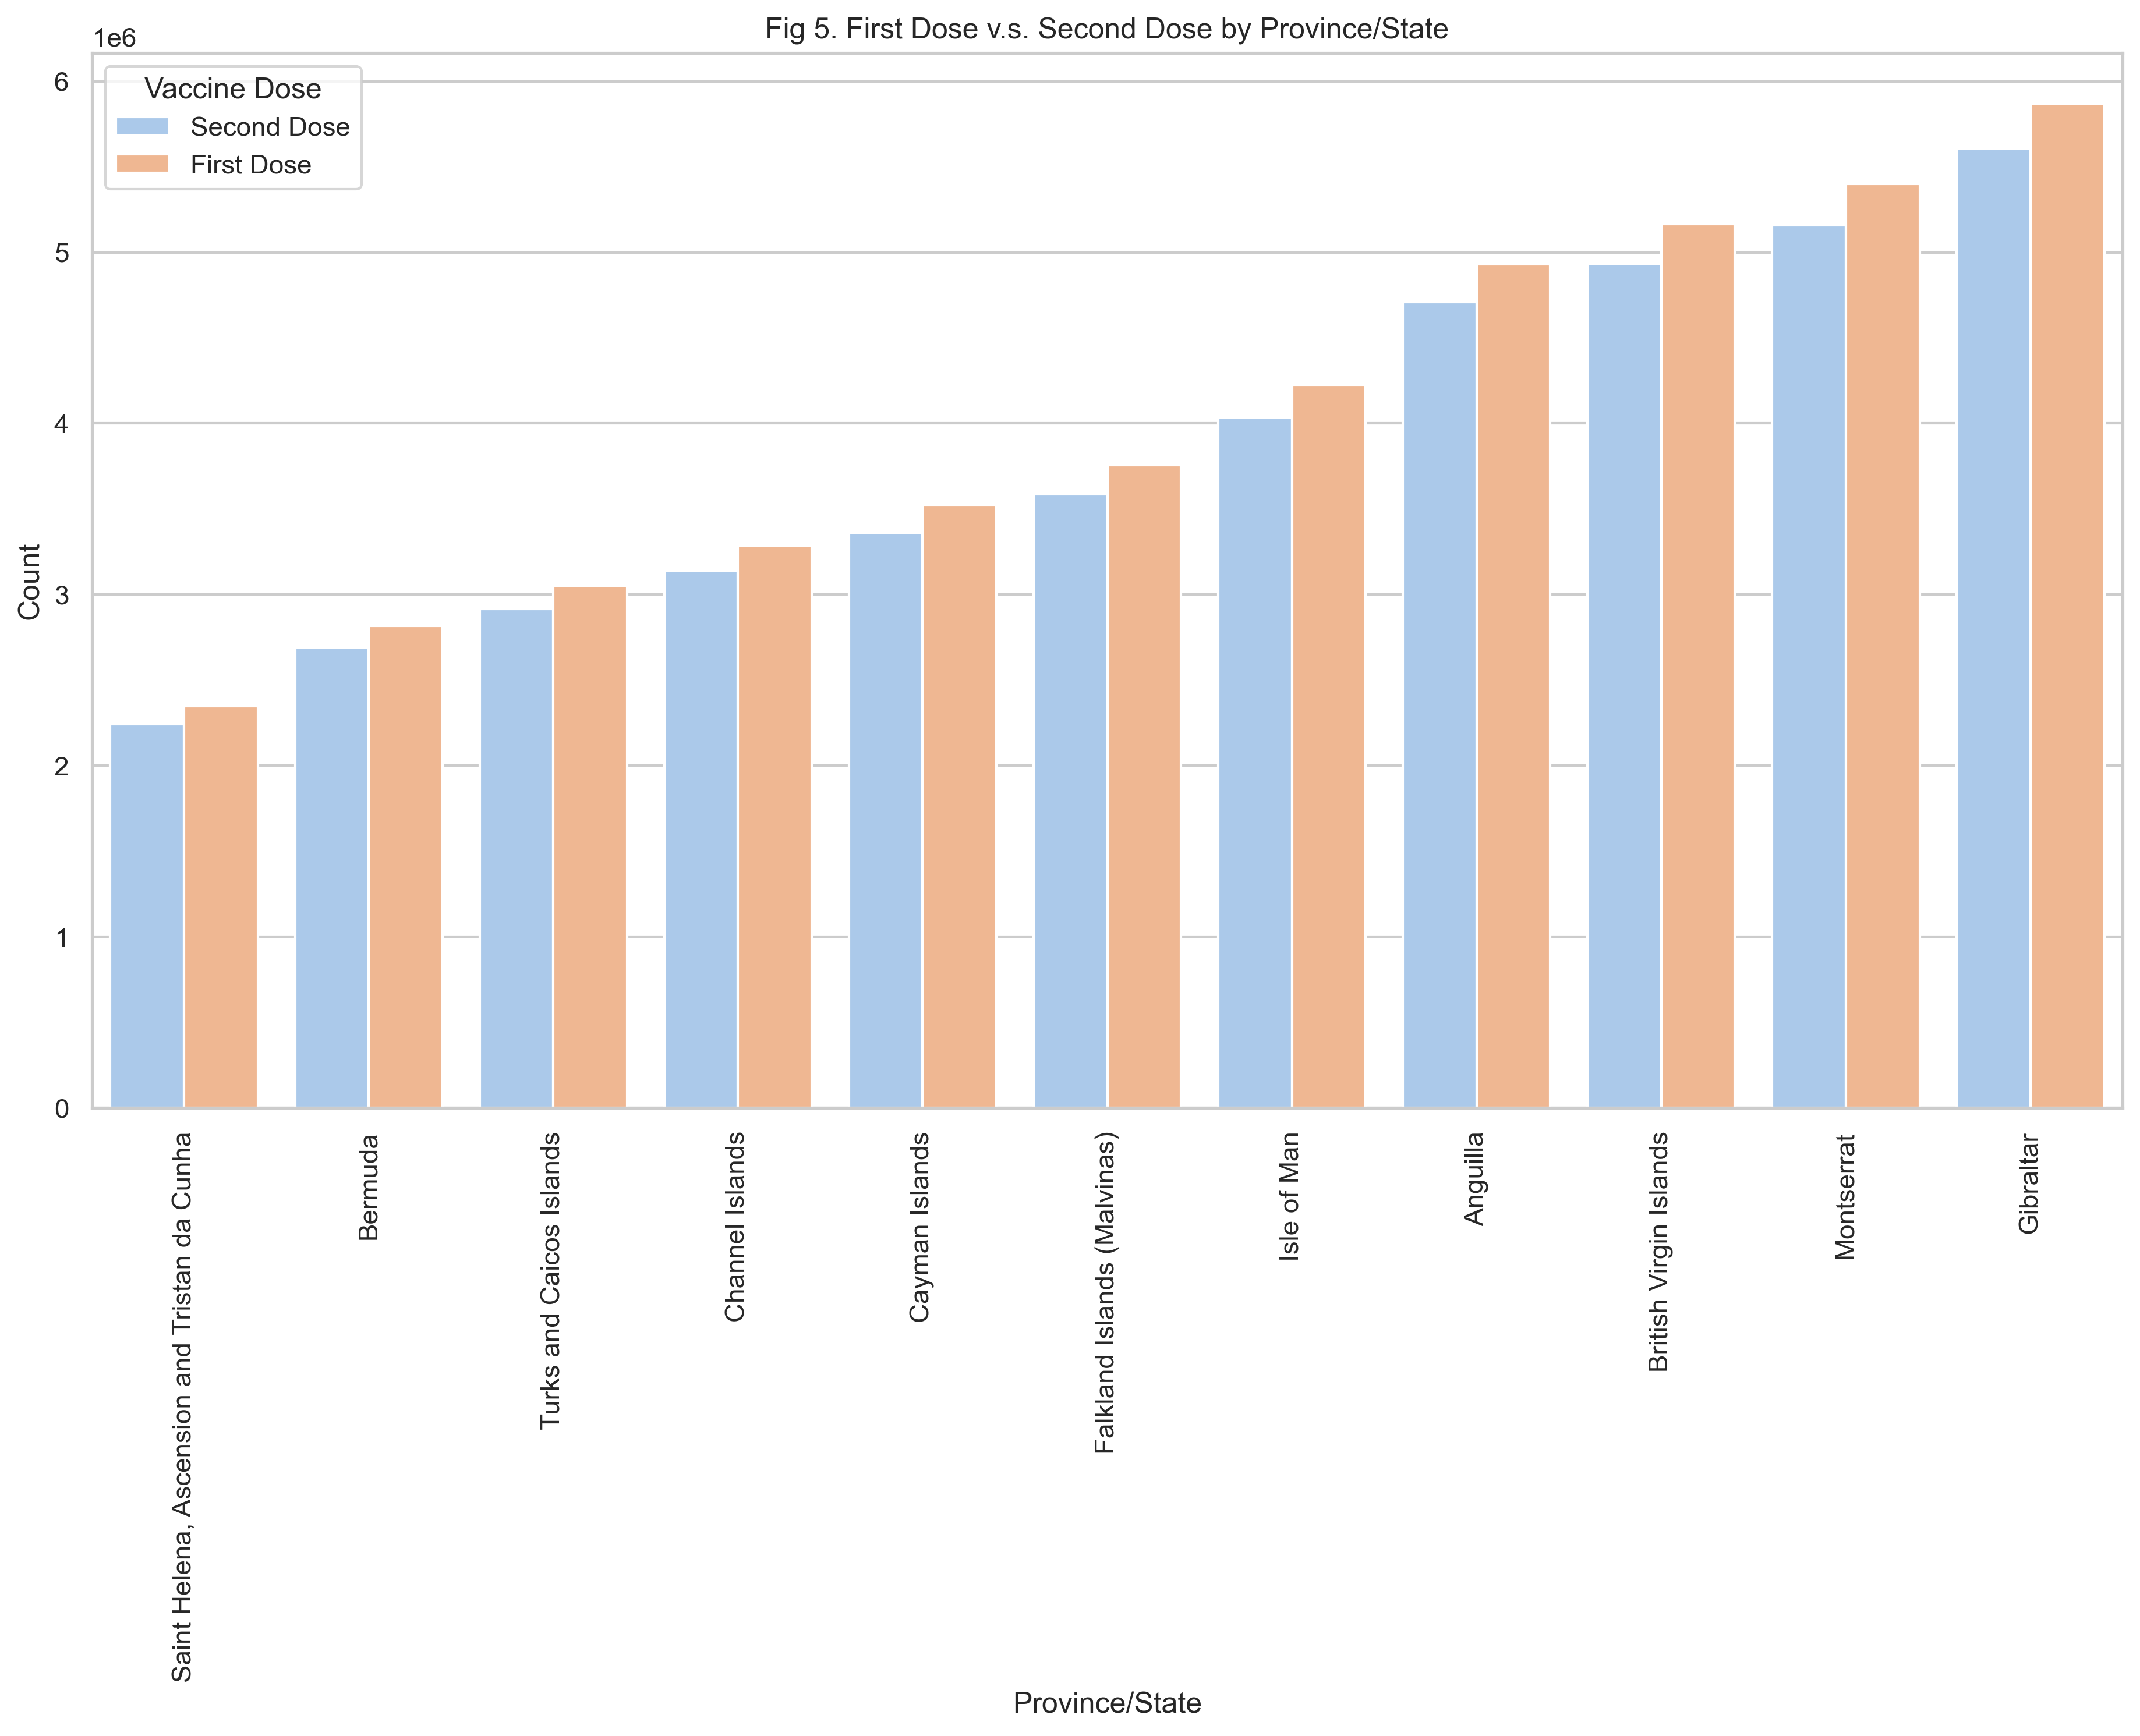

In [48]:
vac_province_count = vac_province_count.sort_values(['Count'])

# Create a barplot to reflect the vaccination situation in each area
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.barplot(x='Province/State', 
            y='Count', 
            hue='Vaccine Dose', 
            estimator=sum, 
            data=vac_province_count,
            ci=None,
            palette='pastel')

# Specify ticks and title.
ax.set_title("Fig 5. First Dose v.s. Second Dose by Province/State")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [49]:
# Create cases_province dataframe to review the covid cases in each province/state
cases_province = cases_vaccinated.groupby(['Province/State','Date'])['Deaths', 'Cases', 'Recovered', 'Hospitalised'].agg('sum')
cases_province = cases_province.reset_index()
cases_province['Month']=pd.to_datetime(cases_province['Date']+pd.offsets.MonthBegin(0))

print(cases_province.shape)
print(cases_province.dtypes)

(6952, 7)
Province/State            object
Date              datetime64[ns]
Deaths                   float64
Cases                    float64
Recovered                float64
Hospitalised             float64
Month             datetime64[ns]
dtype: object


<AxesSubplot:xlabel='Month', ylabel='Deaths'>

Text(0.5, 1.0, 'Fig 6. Deaths Over Time by Province/State')

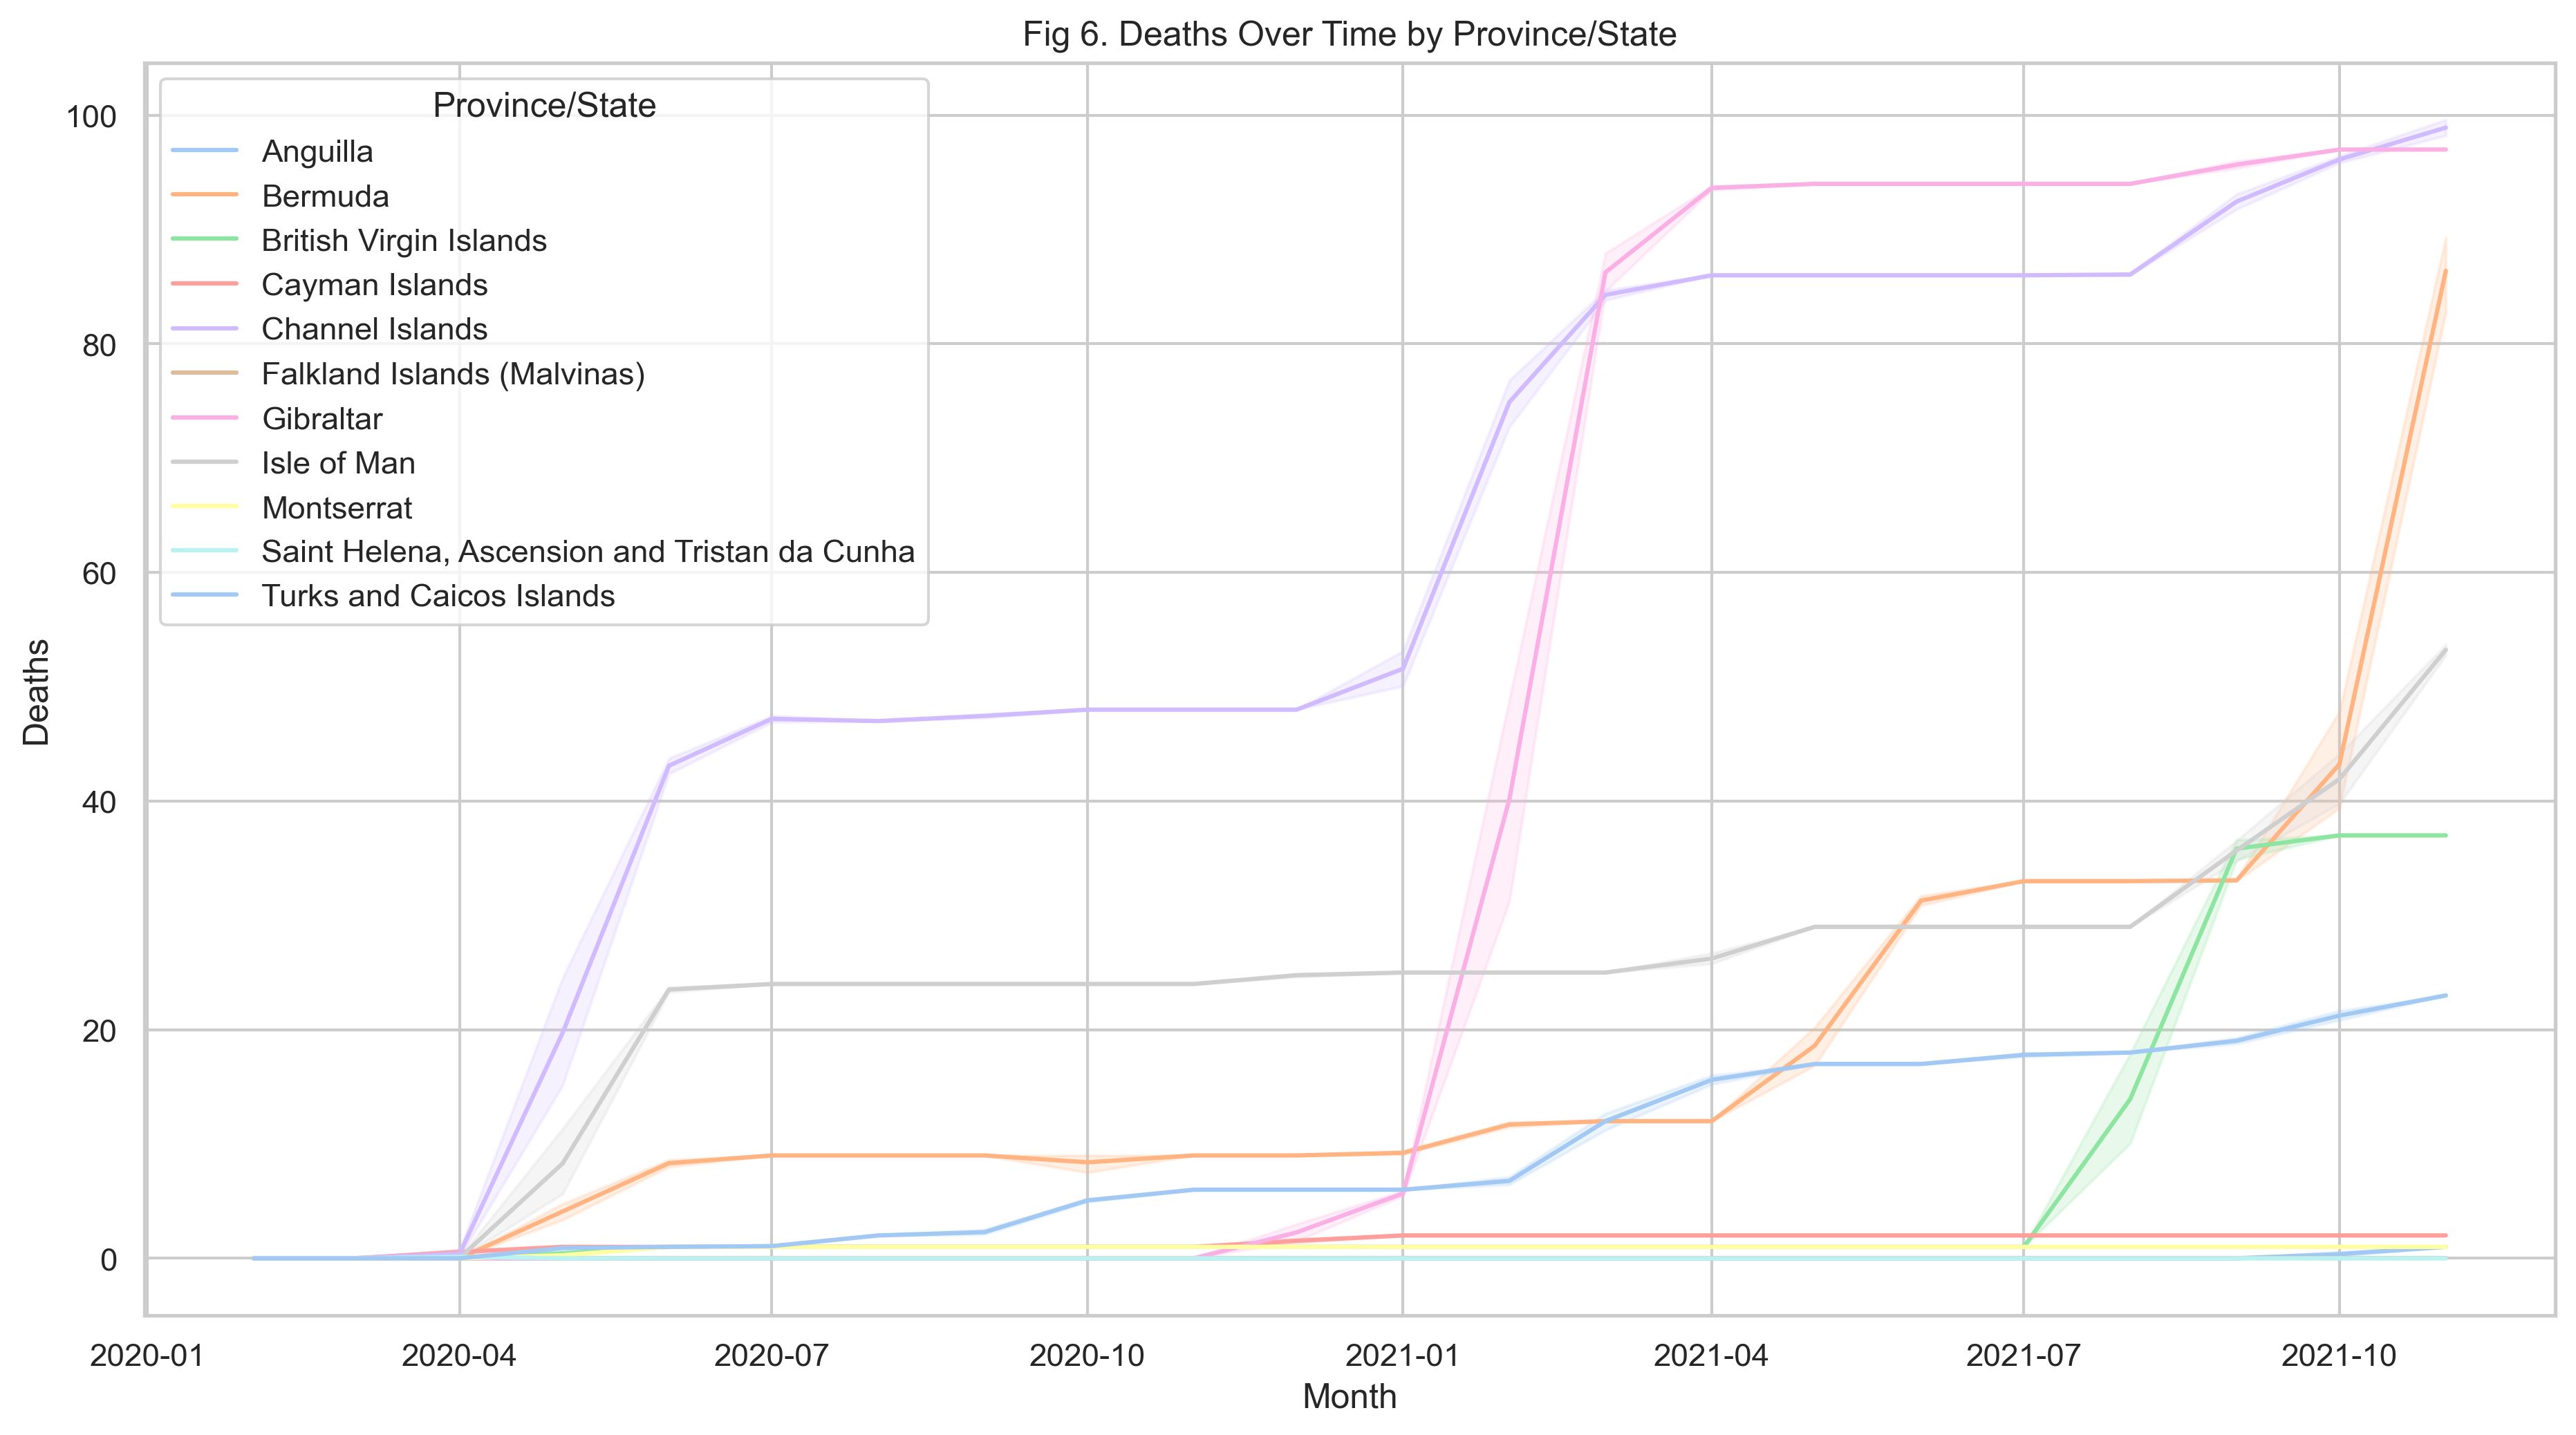

In [50]:
# Create a lineplot to view how deaths changes over time across all region
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.lineplot(x='Month', 
             y='Deaths',
             hue='Province/State', 
             data=cases_province,
             palette='pastel')

# Add title to the lineplot
ax.set_title("Fig 6. Deaths Over Time by Province/State")

<AxesSubplot:xlabel='Month', ylabel='Recovered'>

Text(0.5, 1.0, 'Fig 7. Recovered Cases Over Time by Province/State')

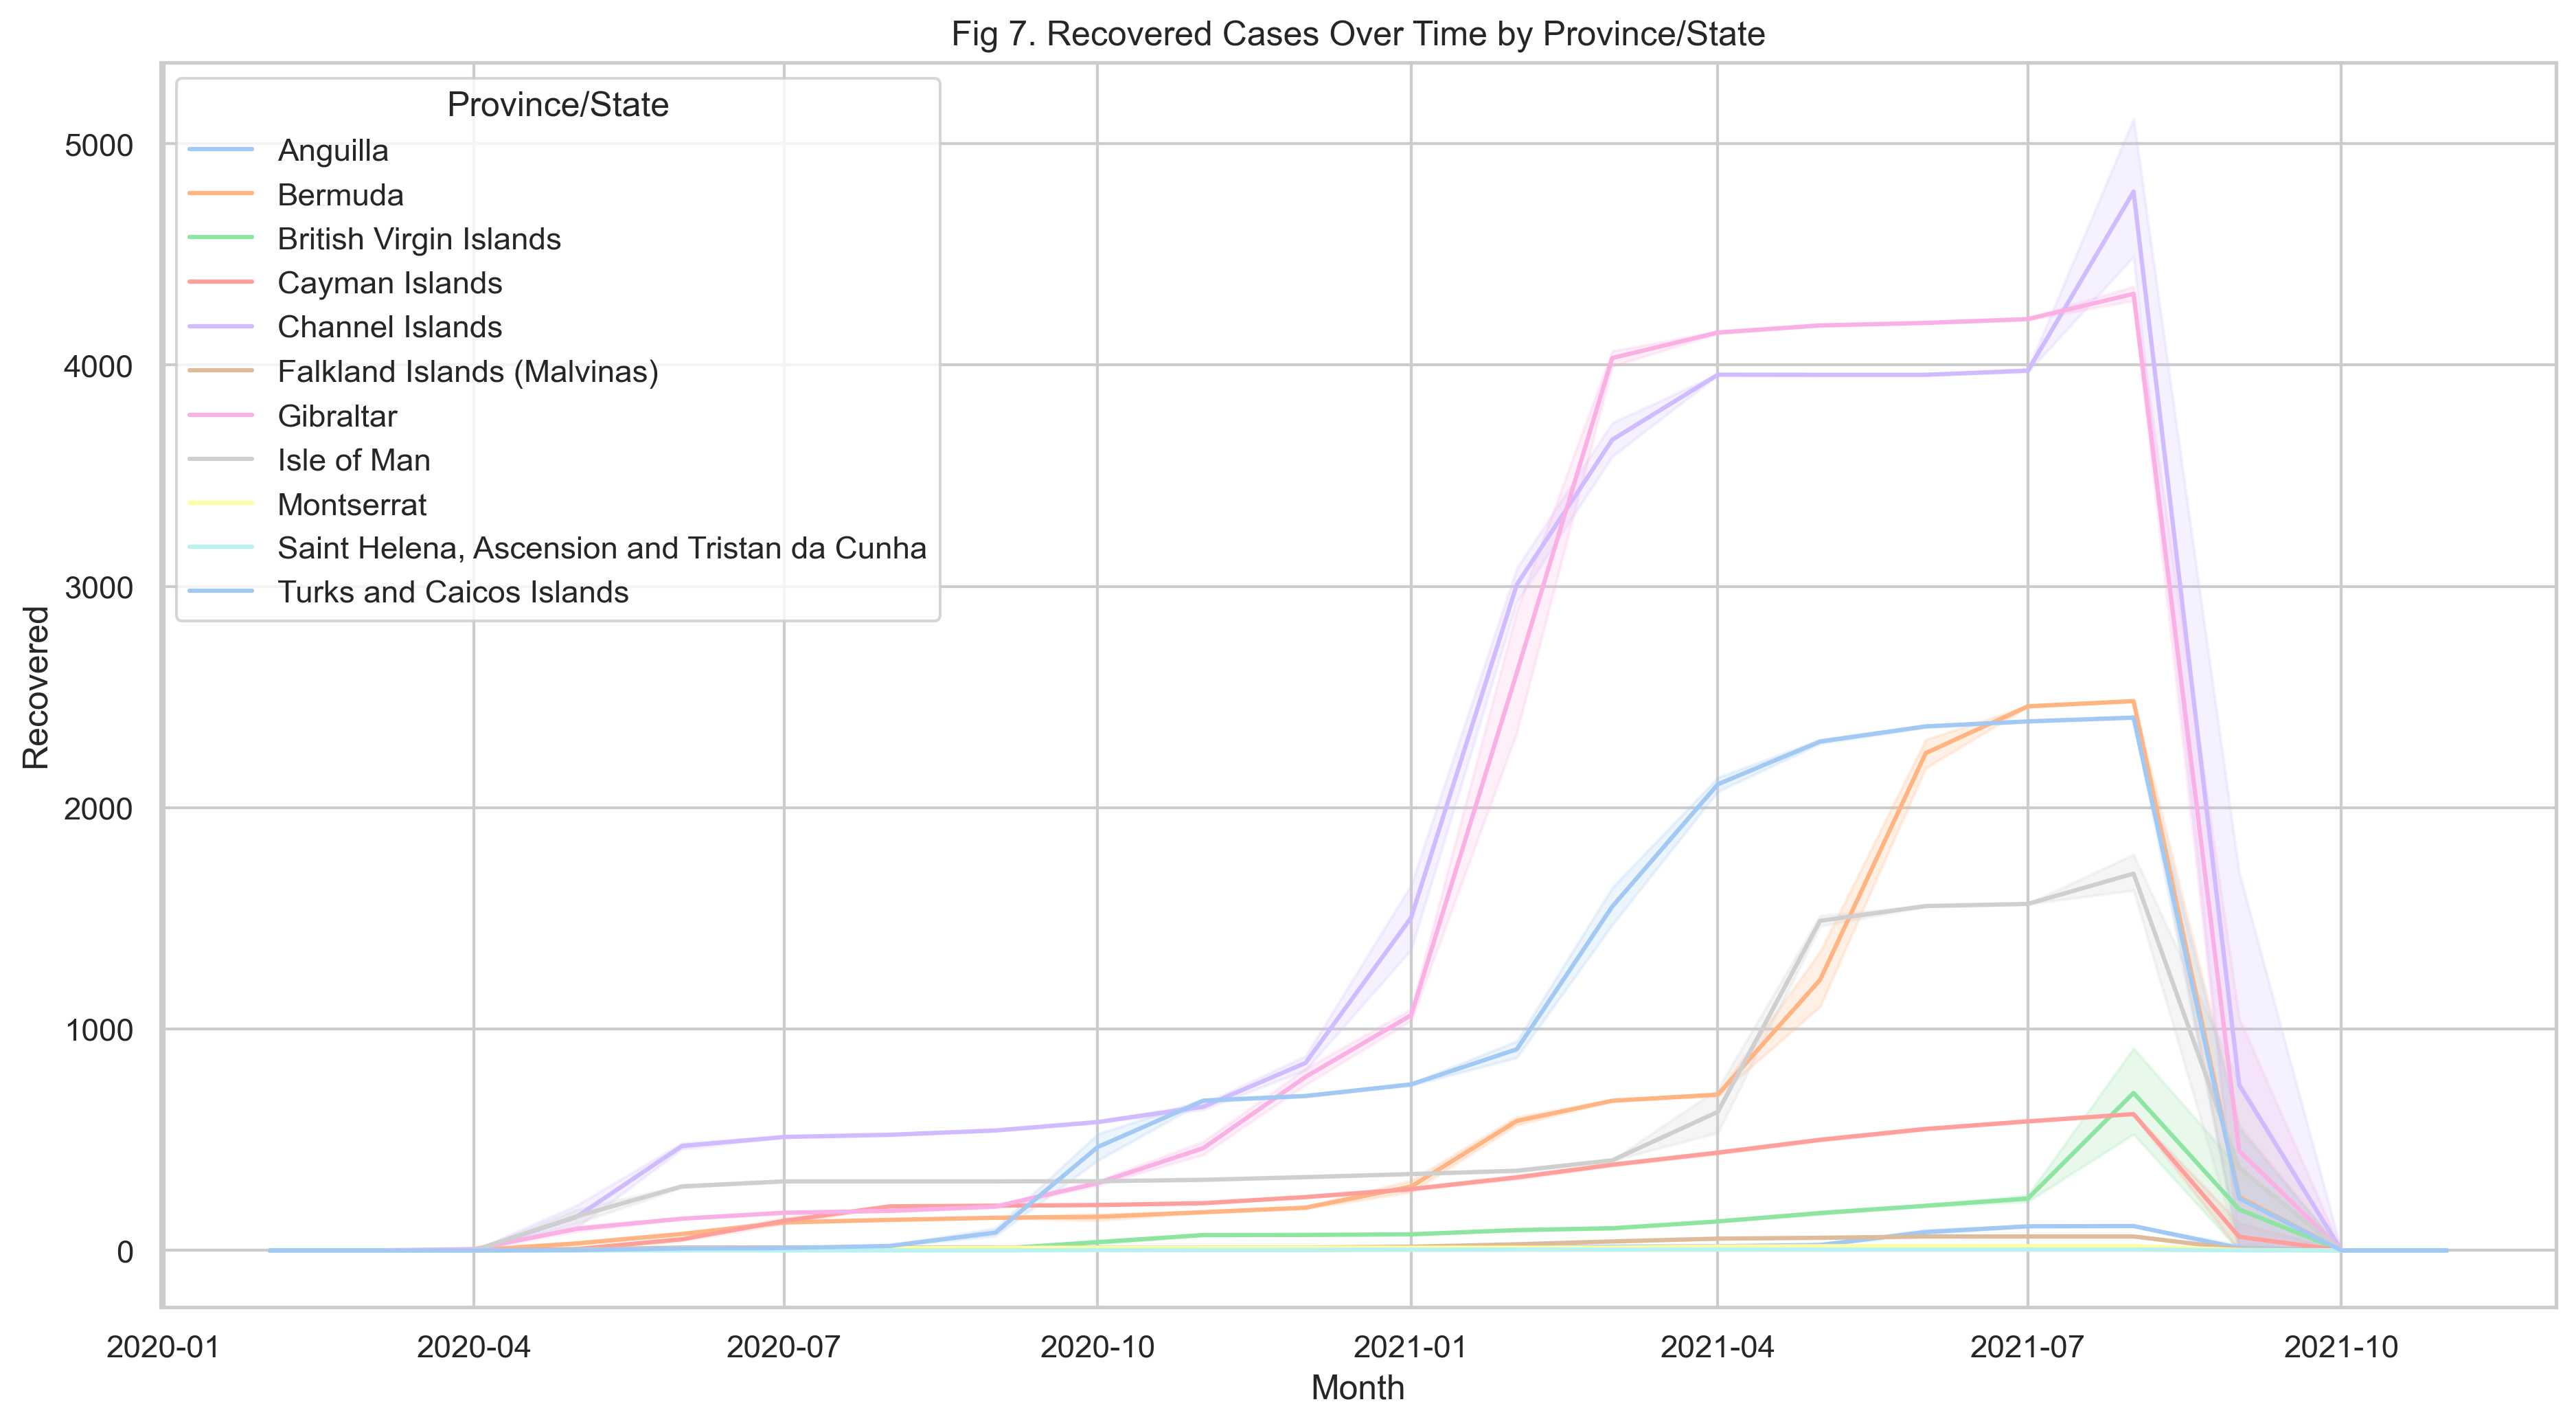

In [51]:
# Create a lineplot to view how recovered cases changes over time across all region
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.lineplot(x='Month', 
             y='Recovered',
             hue='Province/State', 
             data=cases_province,
             palette='pastel')

# Add title to the lineplot
ax.set_title("Fig 7. Recovered Cases Over Time by Province/State")

<AxesSubplot:xlabel='Month', ylabel='Hospitalised'>

Text(0.5, 1.0, 'Fig 8. Hospitalised Cases Over Time by Province/State')

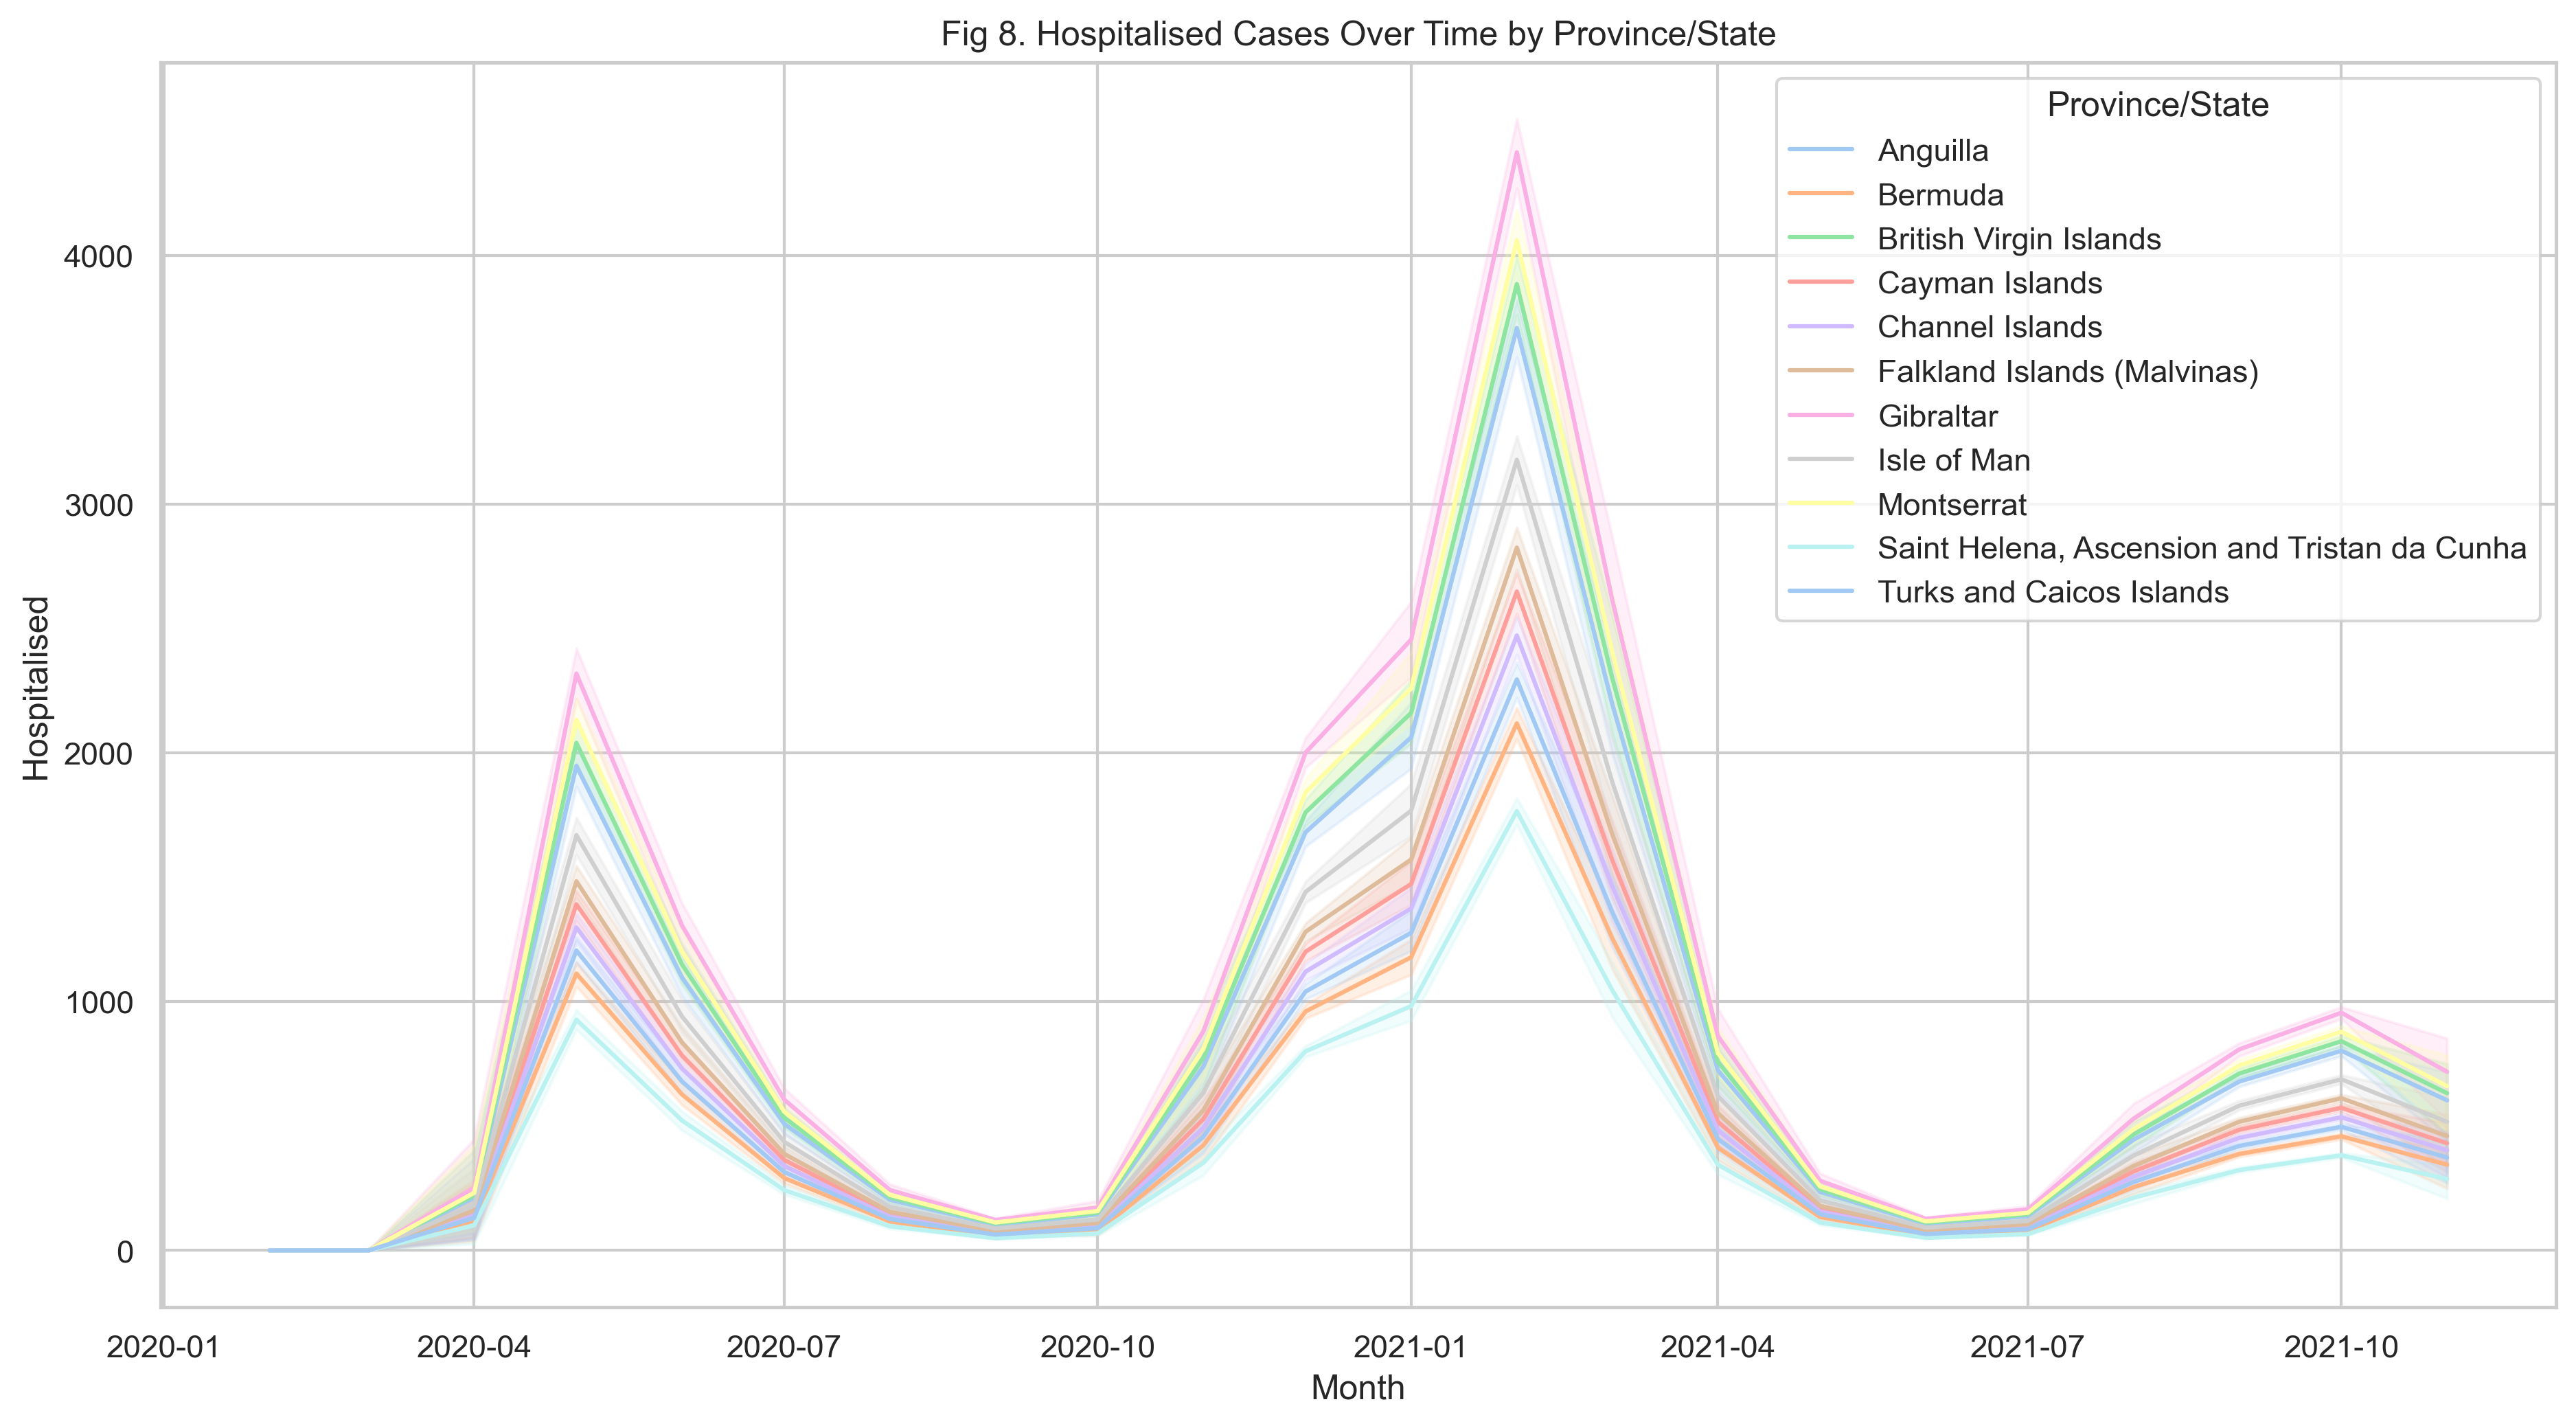

In [52]:
# Create a lineplot to view how hospitalised cases changes over time across all region
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.lineplot(x='Month', 
             y='Hospitalised',
             hue='Province/State', 
             data=cases_province,
             palette='pastel')

# Add title to the lineplot
ax.set_title("Fig 8. Hospitalised Cases Over Time by Province/State")

<AxesSubplot:xlabel='Month', ylabel='Cases'>

Text(0.5, 1.0, 'Fig 9. Positive Cases Over Time by Province/State')

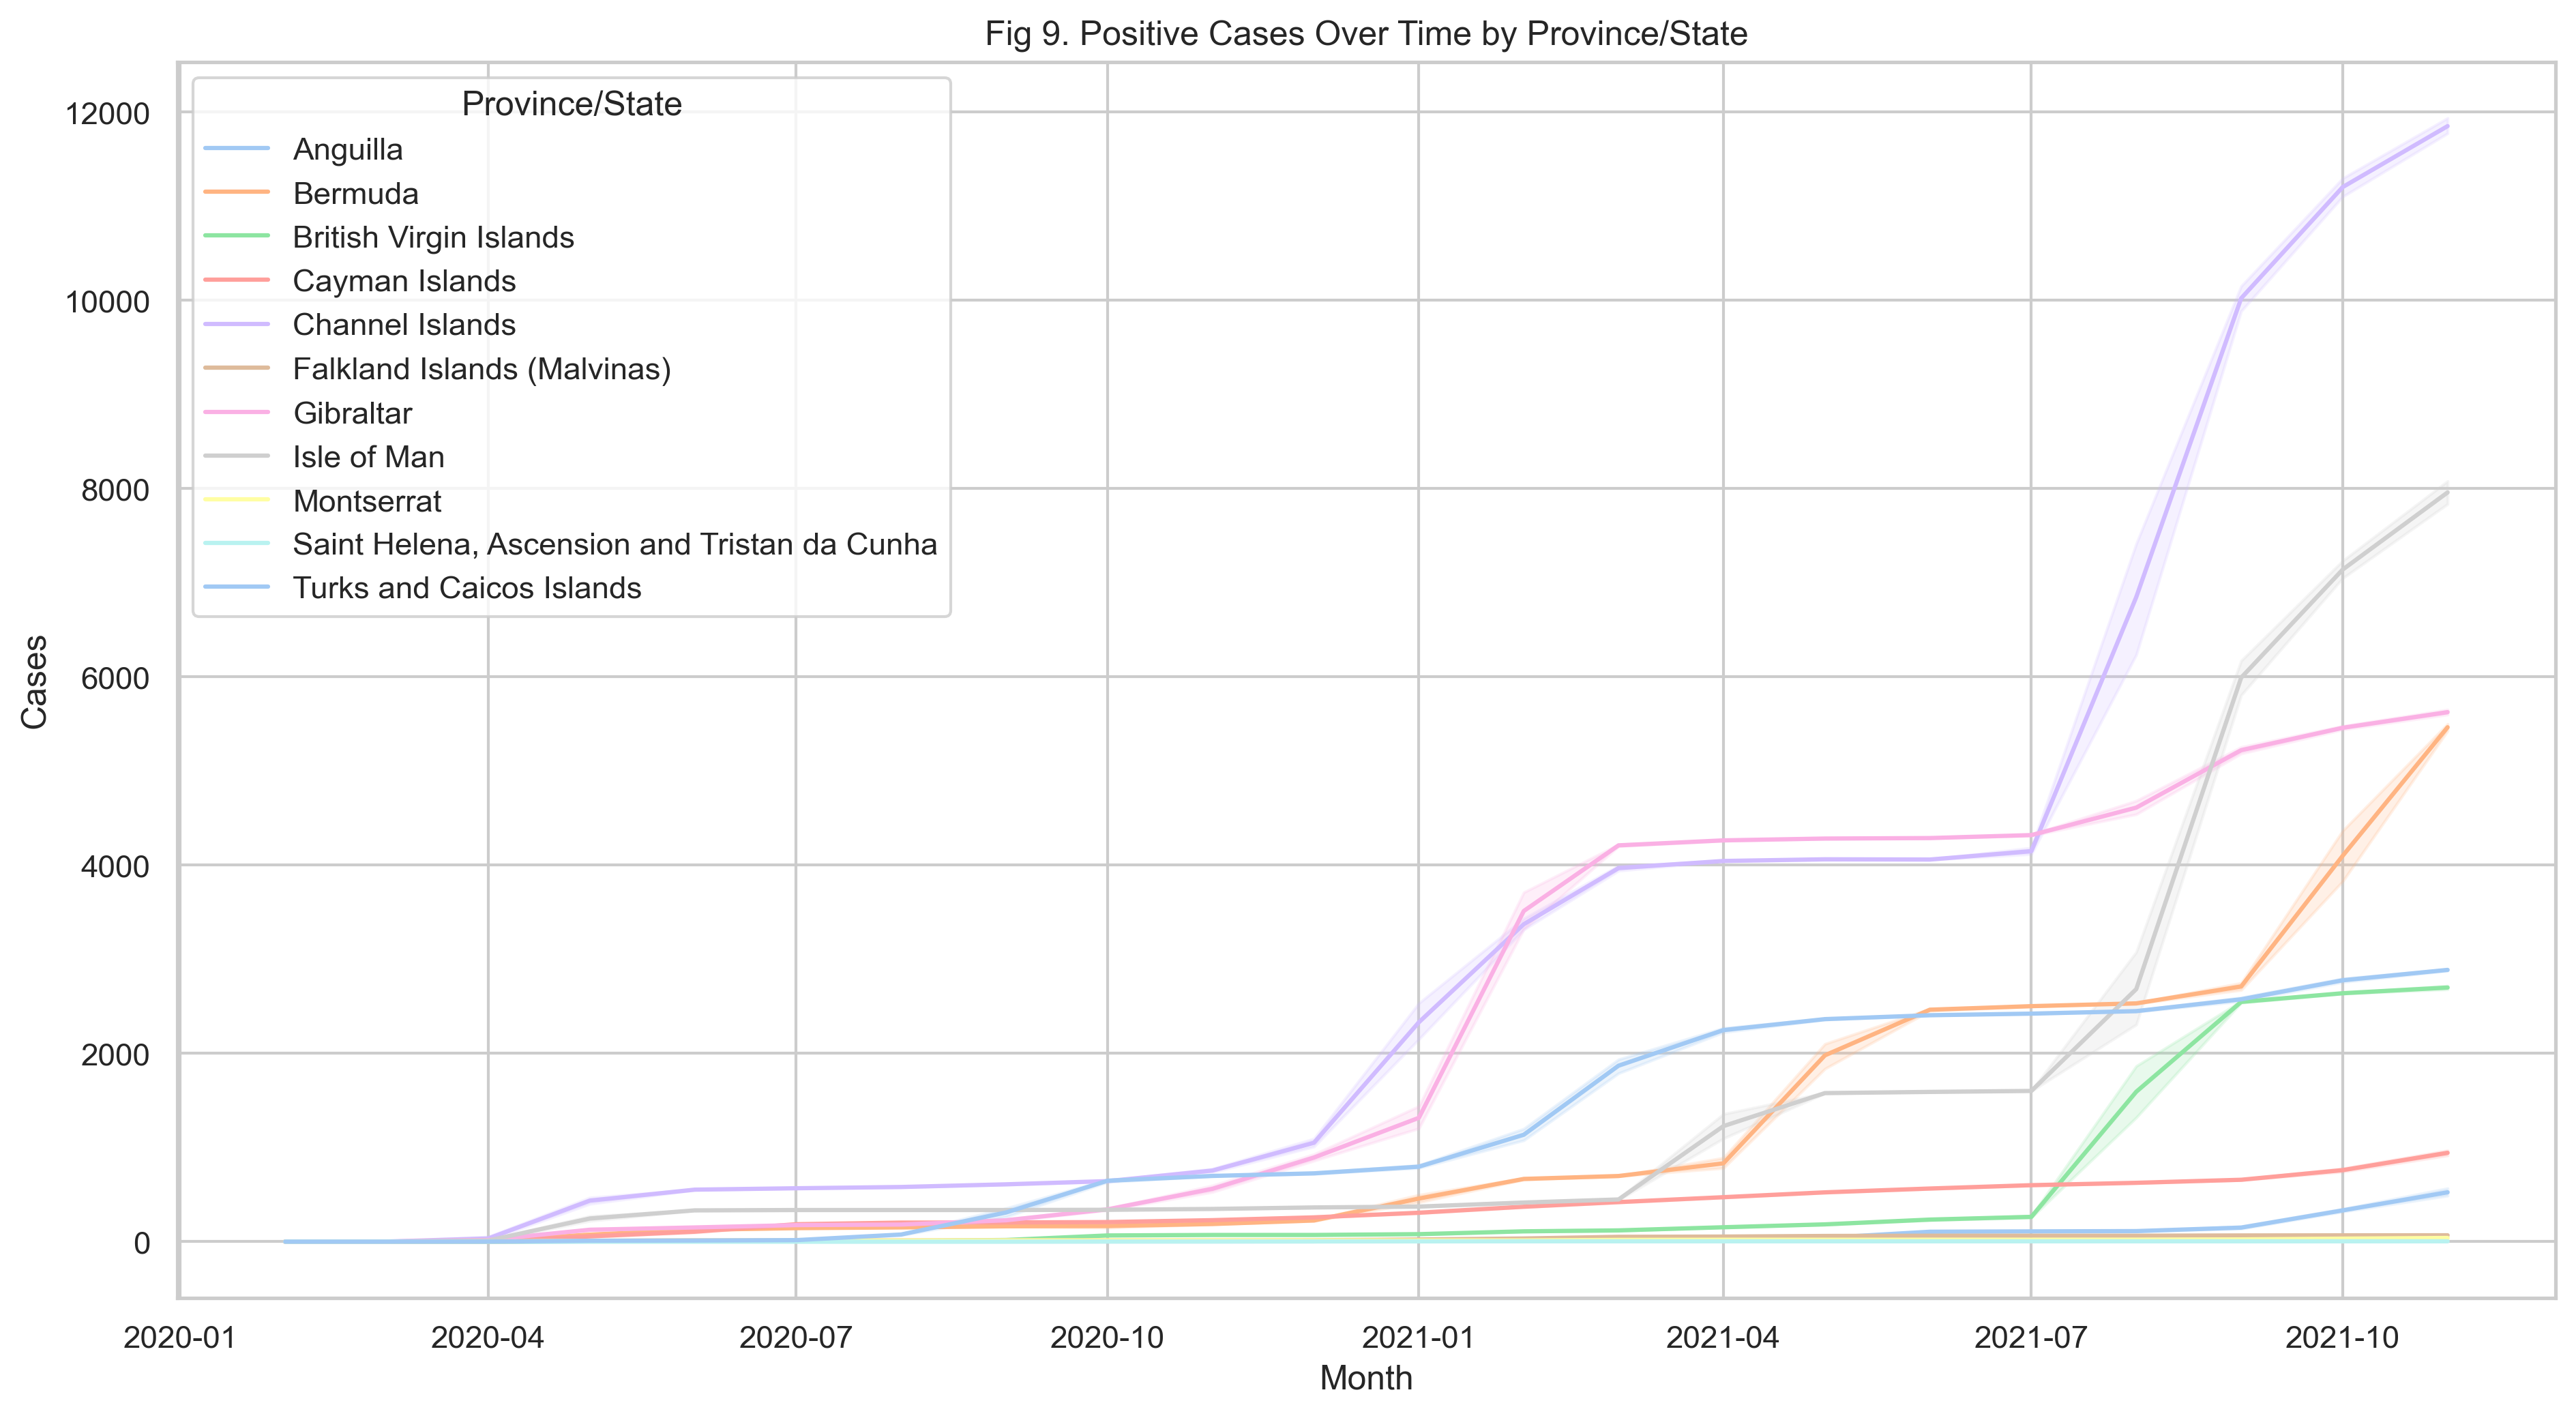

In [53]:
# Create a lineplot to view how positive cases changes over time across all region
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.lineplot(x='Month', 
             y='Cases',
             hue='Province/State', 
             data=cases_province,
             palette='pastel')

# Add title to the lineplot
ax.set_title("Fig 9. Positive Cases Over Time by Province/State")

In [54]:
# Review the total number of cases and death by province/state by filtering the data on 2021-10-14 given that it is cumulative data
cases_province['Date'] = pd.to_datetime(cases_province['Date'])
deaths_total_province = cases_province[(cases_province['Date'].dt.strftime('%Y-%m-%d') == '2021-10-14')]
deaths_total_province = deaths_total_province.drop(['Recovered','Hospitalised','Month'], axis=1)

# Calculate the death rate by province/state
deaths_total_province['Death Rate'] = (deaths_total_province['Deaths']) / (deaths_total_province['Cases'])
deaths_total_province['Death Rate'] = pd.Series(["{0:.2f}%".format(val * 100) for val 
                                               in deaths_total_province['Death Rate']], 
                                               index = deaths_total_province.index)

# View the dataframe in descending order of the death rate
deaths_total_province.sort_values('Death Rate', ascending=False)

Province/State       Date  Deaths  Cases  \
5687                                    Montserrat 2021-10-14       1     41   
1263                                       Bermuda 2021-10-14      95  5,548   
4423                                     Gibraltar 2021-10-14      97  5,727   
1895                        British Virgin Islands 2021-10-14      37  2,725   
3159                               Channel Islands 2021-10-14     100 12,135   
6951                      Turks and Caicos Islands 2021-10-14      23  2,910   
5055                                   Isle of Man 2021-10-14      54  8,343   
2527                                Cayman Islands 2021-10-14       2  1,011   
631                                       Anguilla 2021-10-14       1    644   
3791                   Falkland Islands (Malvinas) 2021-10-14       0     69   
6319  Saint Helena, Ascension and Tristan da Cunha 2021-10-14       0      4   

     Death Rate  
5687      2.44%  
1263      1.71%  
4423      1.69%  
1895      1.36%  
3159      0.82%  
6951      0.79%  
5055      0.65%  
2527      0.20%  
631       0.16%  
3791      0.00%  
6319      0.00%

In [55]:
# Review the total number of cases and recovered by province/state by filtering the data on 2021-08-04 given there is no data after this date
cases_province['Date'] = pd.to_datetime(cases_province['Date'])
recovered_total_province = cases_province[(cases_province['Date'].dt.strftime('%Y-%m-%d') == '2021-08-04')]
recovered_total_province = recovered_total_province.drop(['Deaths','Hospitalised','Month'], axis=1)

# Calculate the recovered rate by province/state
recovered_total_province['Recovered Rate'] = (recovered_total_province['Recovered']) / (recovered_total_province['Cases'])
recovered_total_province['Recovered Rate'] = pd.Series(["{0:.2f}%".format(val * 100) for val 
                                               in recovered_total_province['Recovered Rate']], 
                                               index = recovered_total_province.index)

# View the dataframe in descending order of the recovered rate
recovered_total_province.sort_values('Recovered Rate', ascending=False)

Province/State       Date  Cases  \
2456                                Cayman Islands 2021-08-04    644   
560                                       Anguilla 2021-08-04    113   
6880                      Turks and Caicos Islands 2021-08-04  2,486   
1192                                       Bermuda 2021-08-04  2,589   
3720                   Falkland Islands (Malvinas) 2021-08-04     66   
4352                                     Gibraltar 2021-08-04  5,056   
5616                                    Montserrat 2021-08-04     21   
3088                               Channel Islands 2021-08-04  9,507   
4984                                   Isle of Man 2021-08-04  5,145   
1824                        British Virgin Islands 2021-08-04  2,500   
6248  Saint Helena, Ascension and Tristan da Cunha 2021-08-04      4   

      Recovered Recovered Rate  
2456        635         98.60%  
560         111         98.23%  
6880      2,433         97.87%  
1192      2,503         96.68%  
3720         63         95.45%  
4352      4,670         92.37%  
5616         19         90.48%  
3088      8,322         87.54%  
4984      4,019         78.11%  
1824      1,914         76.56%  
6248          4        100.00%

## 5) Assignment activity 5: External data 
In the next section, you were supplied with a sample file and the question was asked to determine whether there are additional `#tags` or keywords that could potentially provide insights into your COVID-19 analysis. While the sample set is limited, you were asked to review the provided file and demonstrate the typical steps and make recommendations regarding future use of similar data sets to provide richer insights.

### 5.1) Report expectations:
- Demonstrate basic ability to work with Twitter data.
- Search for hash-tags or keywords.
- Create DataFrames and visualisations.
- Note your observations.

### 5.2) Presentation expectations:
Discuss whether external data could potentially be used and whether it is a viable solution to pursue. Discuss your assumptions and suggestions. 

Points to consider:
- What insights can be gained from the data?
- What are the advantages and disadvantages of using external data?
- How would you suggest using external data in the project?

### Week 5 Notes and Observations
- The Tweets data are collected in May 2022
- The top hashtags and words in the Tweets data are netural words that reflects how the general public are used to COVID-19 with less negative emotions. Yet, the data size is too small that more data should be scraped from Twitter for a better review
- Vaccine doesn't appear to be a topic that is widely discussed on Twitter
- People are having high interest towards 'Athen', 'China' and 'Greece' that worth to further explore
- The data from Twitter provide a wider picture to review the COVID-19 situation in the word of public. However, it is vital to vet and critically analyse the data carefully to avoid misusing the data.

In [56]:
# Import the tweet data set
tweets = pd.read_csv('/Users/chanhiukiu/Documents/professional development/learning/lse data analytics career accelerator/course 2/assessment 2/LSE_DA201_Assignment_files/tweets.csv')

In [57]:
# Get info
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3959 non-null   object 
 1   id                         3959 non-null   float64
 2   id_str                     3959 non-null   float64
 3   text                       3959 non-null   object 
 4   truncated                  3959 non-null   object 
 5   source                     3959 non-null   object 
 6   in_reply_to_status_id      0 non-null      float64
 7   in_reply_to_status_id_str  0 non-null      float64
 8   in_reply_to_user_id        0 non-null      float64
 9   in_reply_to_user_id_str    0 non-null      float64
 10  in_reply_to_screen_name    0 non-null      float64
 11  contributors               0 non-null      float64
 12  is_quote_status            3959 non-null   object 
 13  retweet_count              3960 non-null   int64

In [58]:
# Display the head
tweets.head()

created_at                        id                    id_str  \
0  23/05/2022 1,528,750,000,000,000,000 1,528,750,000,000,000,000   
1  23/05/2022 1,528,720,000,000,000,000 1,528,720,000,000,000,000   
2  23/05/2022 1,528,650,000,000,000,000 1,528,650,000,000,000,000   
3  23/05/2022 1,528,610,000,000,000,000 1,528,610,000,000,000,000   
4  23/05/2022 1,528,600,000,000,000,000 1,528,600,000,000,000,000   

                                                                                                                                                                                                      text  \
0  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
1                                                                                             #COVID19 is linked to more #diabetes diagnoses in kids, CDC study finds https://t.co/H5lO1W7Skd via @YouTube   
2  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
3  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
4  Advanced healthcare at your fingertips\nhttps://t.co/aUQ93qFsJ4 | +443333053358\n#slough #sloughtownfc #sloughtown #sloughi #windsor #windsorcastle #diabetes #physician #generalphysician\n#hospita...   

  truncated  \
0     False   
1     False   
2     False   
3     False   
4     False   

                                                                                source  \
0        <a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>   
1   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2        <a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>   
3        <a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>   
4  <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>   

   in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                    NaN                        NaN                  NaN   
1                    NaN                        NaN                  NaN   
2                    NaN                        NaN                  NaN   
3                    NaN                        NaN                  NaN   
4                    NaN                        NaN                  NaN   

   in_reply_to_user_id_str  ...  contributors  is_quote_status retweet_count  \
0                      NaN  ...           NaN            False             0   
1                      NaN  ...           NaN            False             0   
2                      NaN  ...           NaN            False             0   
3                      NaN  ...           NaN            False             0   
4                      NaN  ...           NaN            False             0   

   favorite_count  favorited retweeted lang possibly_sensitive  \
0               0      False     False   en              False   
1               1      False     False   en              False   
2               0      False     False   en              False   
3               0      False     False   en              False   
4               0      False     False   en              False   

  quoted_status_id  quoted_status_id_str  
0              NaN                   NaN  
1              NaN                   NaN  
2              NaN                   NaN  
3              NaN                   NaN  
4              NaN                   NaN  

[5 rows x 21 columns]

In [59]:
tweets.retweet_count.value_counts()

0      2818
1       570
2       190
3        96
4        54
       ... 
49        1
33        1
261       1
212       1
52        1
Name: retweet_count, Length: 67, dtype: int64

In [60]:
tweets.favorite_count.value_counts()

0       2240
1        682
2        252
3        174
4        100
        ... 
41         1
116        1
741        1
3433       1
301        1
Name: favorite_count, Length: 117, dtype: int64

In [61]:
# Create a new dataframe containing only the text
tweets['text'] = tweets['text'].astype(str)
tweets_text = tweets['text'].apply(lambda x: x if x.strip() != None else None)

In [62]:
# Loop through the message and create a list of values containing the # symbol
tags = []
for y in [x.split(' ') for x in tweets_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z)

# Create a Series containing the value counts in our list
tags=pd.Series(tags).value_counts()

In [63]:
#Display the first 30 records
tags.head(30)

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Shanghai                 63
#Covid_19                 63
#datavisualization        63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

In [64]:
# Convert the series to a dataframe in preparation for visulisation
# Use all the words up to risk and remove the whitespace
data = pd.DataFrame(tags).reset_index()
#Rename the columns
data.columns = ['word','count']
# Fix count datatype
data['count'] = data['count'].astype(int)
data

word  count
0                       #COVID19   1632
1                #CovidIsNotOver    472
2                         #China    262
3                       #covid19    176
4                       #Covid19    148
...                          ...    ...
4771  hospital.\n#CovidIsNotOver      1
4772           #OmicronIsNotMild      1
4773                 #Covid19NSW      1
4774                   #CovidNSW      1
4775      total.\n\n#coronavirus      1

[4776 rows x 2 columns]

In [65]:
# Display records where the count is larger than 100
display(data.loc[(data['count']>100)])

word  count
0         #COVID19   1632
1  #CovidIsNotOver    472
2           #China    262
3         #covid19    176
4         #Covid19    148
5           #COVID    108
6           #covid    104
7          #Greece    103

Text(0.5, 1.0, 'Fig 10. Top 8 Twitter Hashtags')

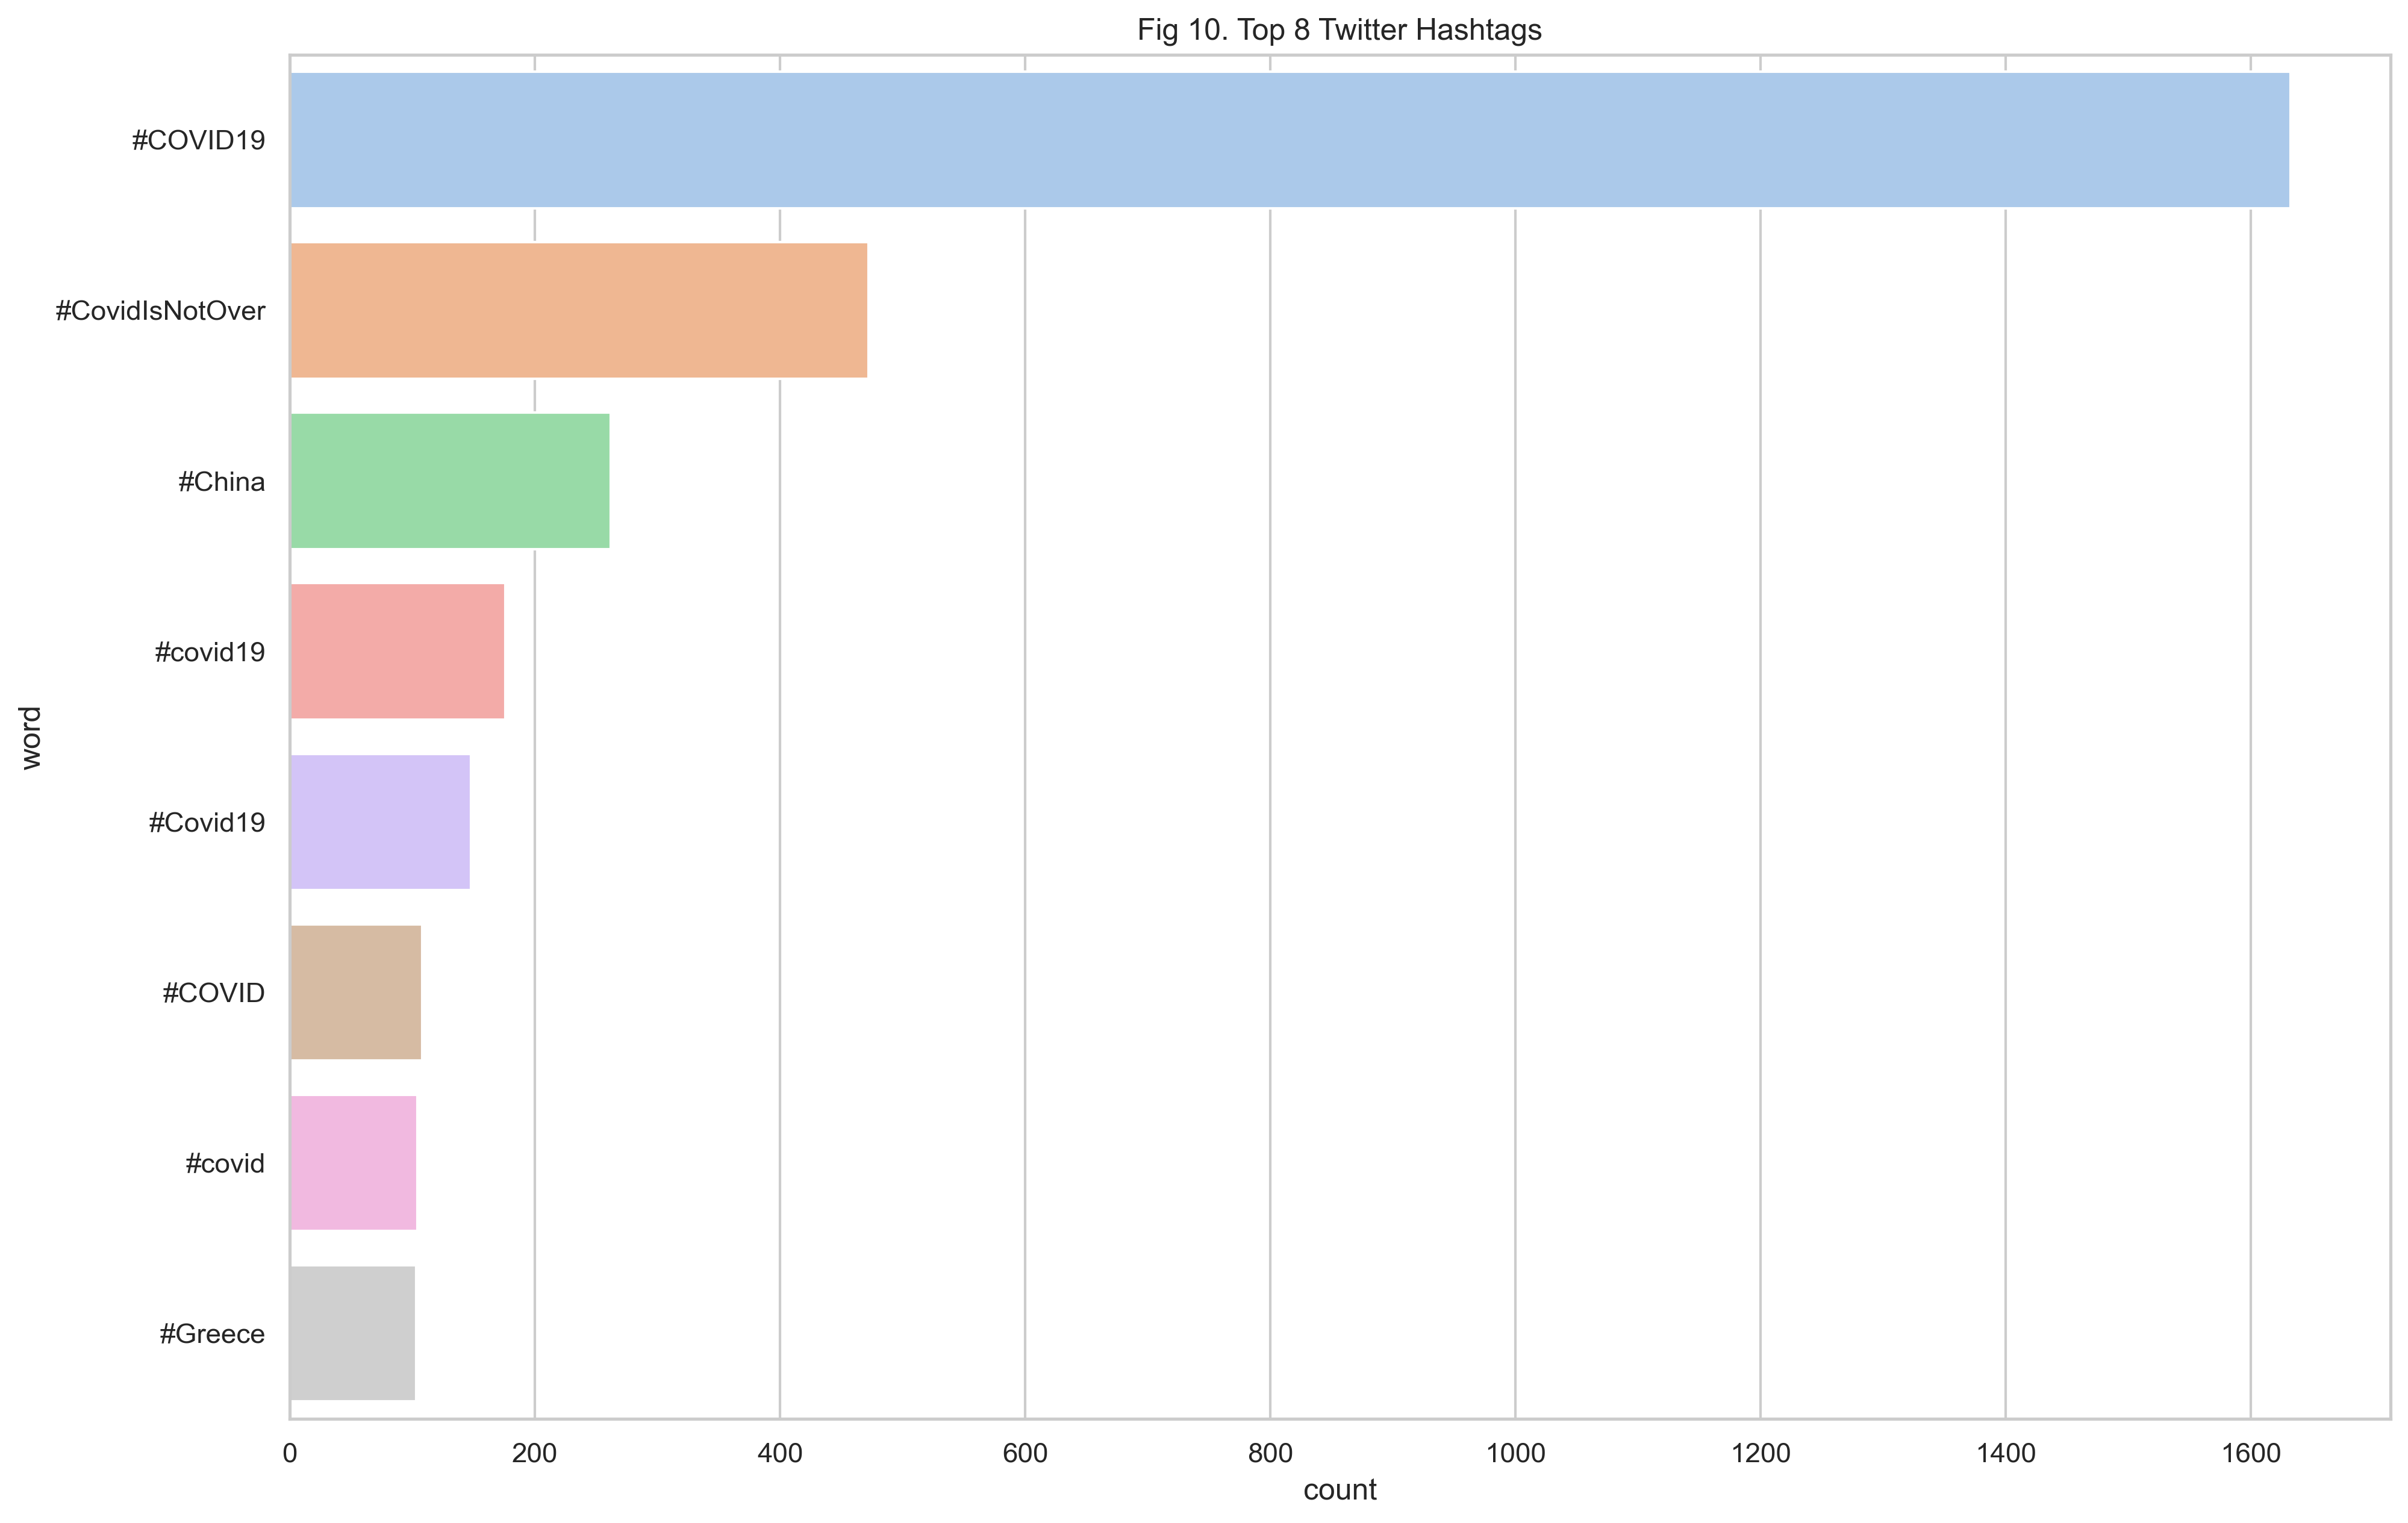

In [66]:
# Plot the records where the count is larger than one hundred using a seaborn barplot with the y set to 'words'
ax = sns.barplot(x="count", 
                 y="word", 
                 data=data.loc[(data['count']>100)],
                 palette='pastel')

# Add title to the chart
ax.set_title("Fig 10. Top 8 Twitter Hashtags")

In [67]:
# Import NLTK for list of stopwords to be removed in the dataset
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sw_list = set(stopwords.words('english'))

# Manual list of stopwords to be removed in the dataset
sw_list = ['a', 'about', 'actually', 'almost', 'also', 'although', 'always', 'am', 'an', 'and',
          'any', 'are', 'as', 'at', 'be', 'became', 'become', 'but', 'by', 'can', 'could', 'did',
          'do', 'does', 'each', 'either', 'else', 'for', 'from', 'had', 'has', 'have', 'hence',
          'how', 'i', 'if', 'in', 'is', 'it', 'its', 'just', 'may', 'maybe', 'me', 'might', 'mine',
          'must', 'my', 'neither', 'nor', 'not', 'of', 'oh', 'ok', 'when', 'whenever', 'where',
          'whereas', 'wherever', 'whether', 'which', 'while', 'who', 'whoever', 'whom', 'whose',
          'why', 'will', 'with', 'within', 'without', 'would', 'yes', 'yet', 'you', 'your', 'to',
          'the', 'of', 'and', 'are', 'was', 'this', 'on', 'now', 'over', 'us', 'so', 'more', 'our',
          'they', 'we', 'after', 'or', 'no', 'still', 'day', 'out', 'our', 'one', 'all', "&amp;", '–', 
           '|', 'that', ' ', '-']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chanhiukiu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
# Convert the text of the tweets to a list of tweets
tweets_text_values = tweets_text.values

# Convert each of the tweets to a list of words
tweets_text_values_words = [x.split(' ') for x in tweets_text_values]

# Create empty list
tweets_text_values_words_all = [ ]

# Append to the list and remove http, mentions, and, selected keywords
tweets_text_values_words_all = [z for y in tweets_text_values_words for z in y if 'http' not in z and not z.startswith(("@","#")) and z.lower() not in sw_list]
# Create a series with the value counts of keywords identified
tweets_text_values_words_all = pd.Series(tweets_text_values_words_all).value_counts()

In [69]:
# Display the first 50 entries of the Series
tweets_text_values_words_all.head(50)

               1738
Covid           348
people          303
Greece          275
COVID-19        267
cases           228
Athens,         211
Athens          209
new             205
COVID           198
been            185
Covid-19        153
being           152
vaccine         147
COVID19         143
up              142
China           141
covid           140
their           135
per             126
like            125
I’m             125
way             124
were            123
cause           118
get             118
New             111
safe            111
via             110
first           108
pandemic        106
Please          104
until           100
join            100
during           99
than             98
said             97
protection       96
reported         95
Coronavirus      94
sign             91
Deaths           90
safe.            90
Health           89
positive         88
stand            87
urging           86
denied           86
urgently         86
2022             86


In [70]:
# Use the Series to create a dataframe in preparation for visualisation

# Use all the words up to risk and remove the whitespace
data2 = pd.DataFrame(tweets_text_values_words_all.head(16)).reset_index()

# Rename the columns
data2.columns = ['word','count']

In [71]:
# Display the result
data2 = data2[data2['word'].str.strip('word') !='']
data2

word  count
1      Covid    348
2     people    303
3     Greece    275
4   COVID-19    267
5      cases    228
6    Athens,    211
7     Athens    209
8        new    205
9      COVID    198
10      been    185
11  Covid-19    153
12     being    152
13   vaccine    147
14   COVID19    143
15        up    142

Text(0.5, 1.0, 'Fig 11. Most Used Word in Tweets')

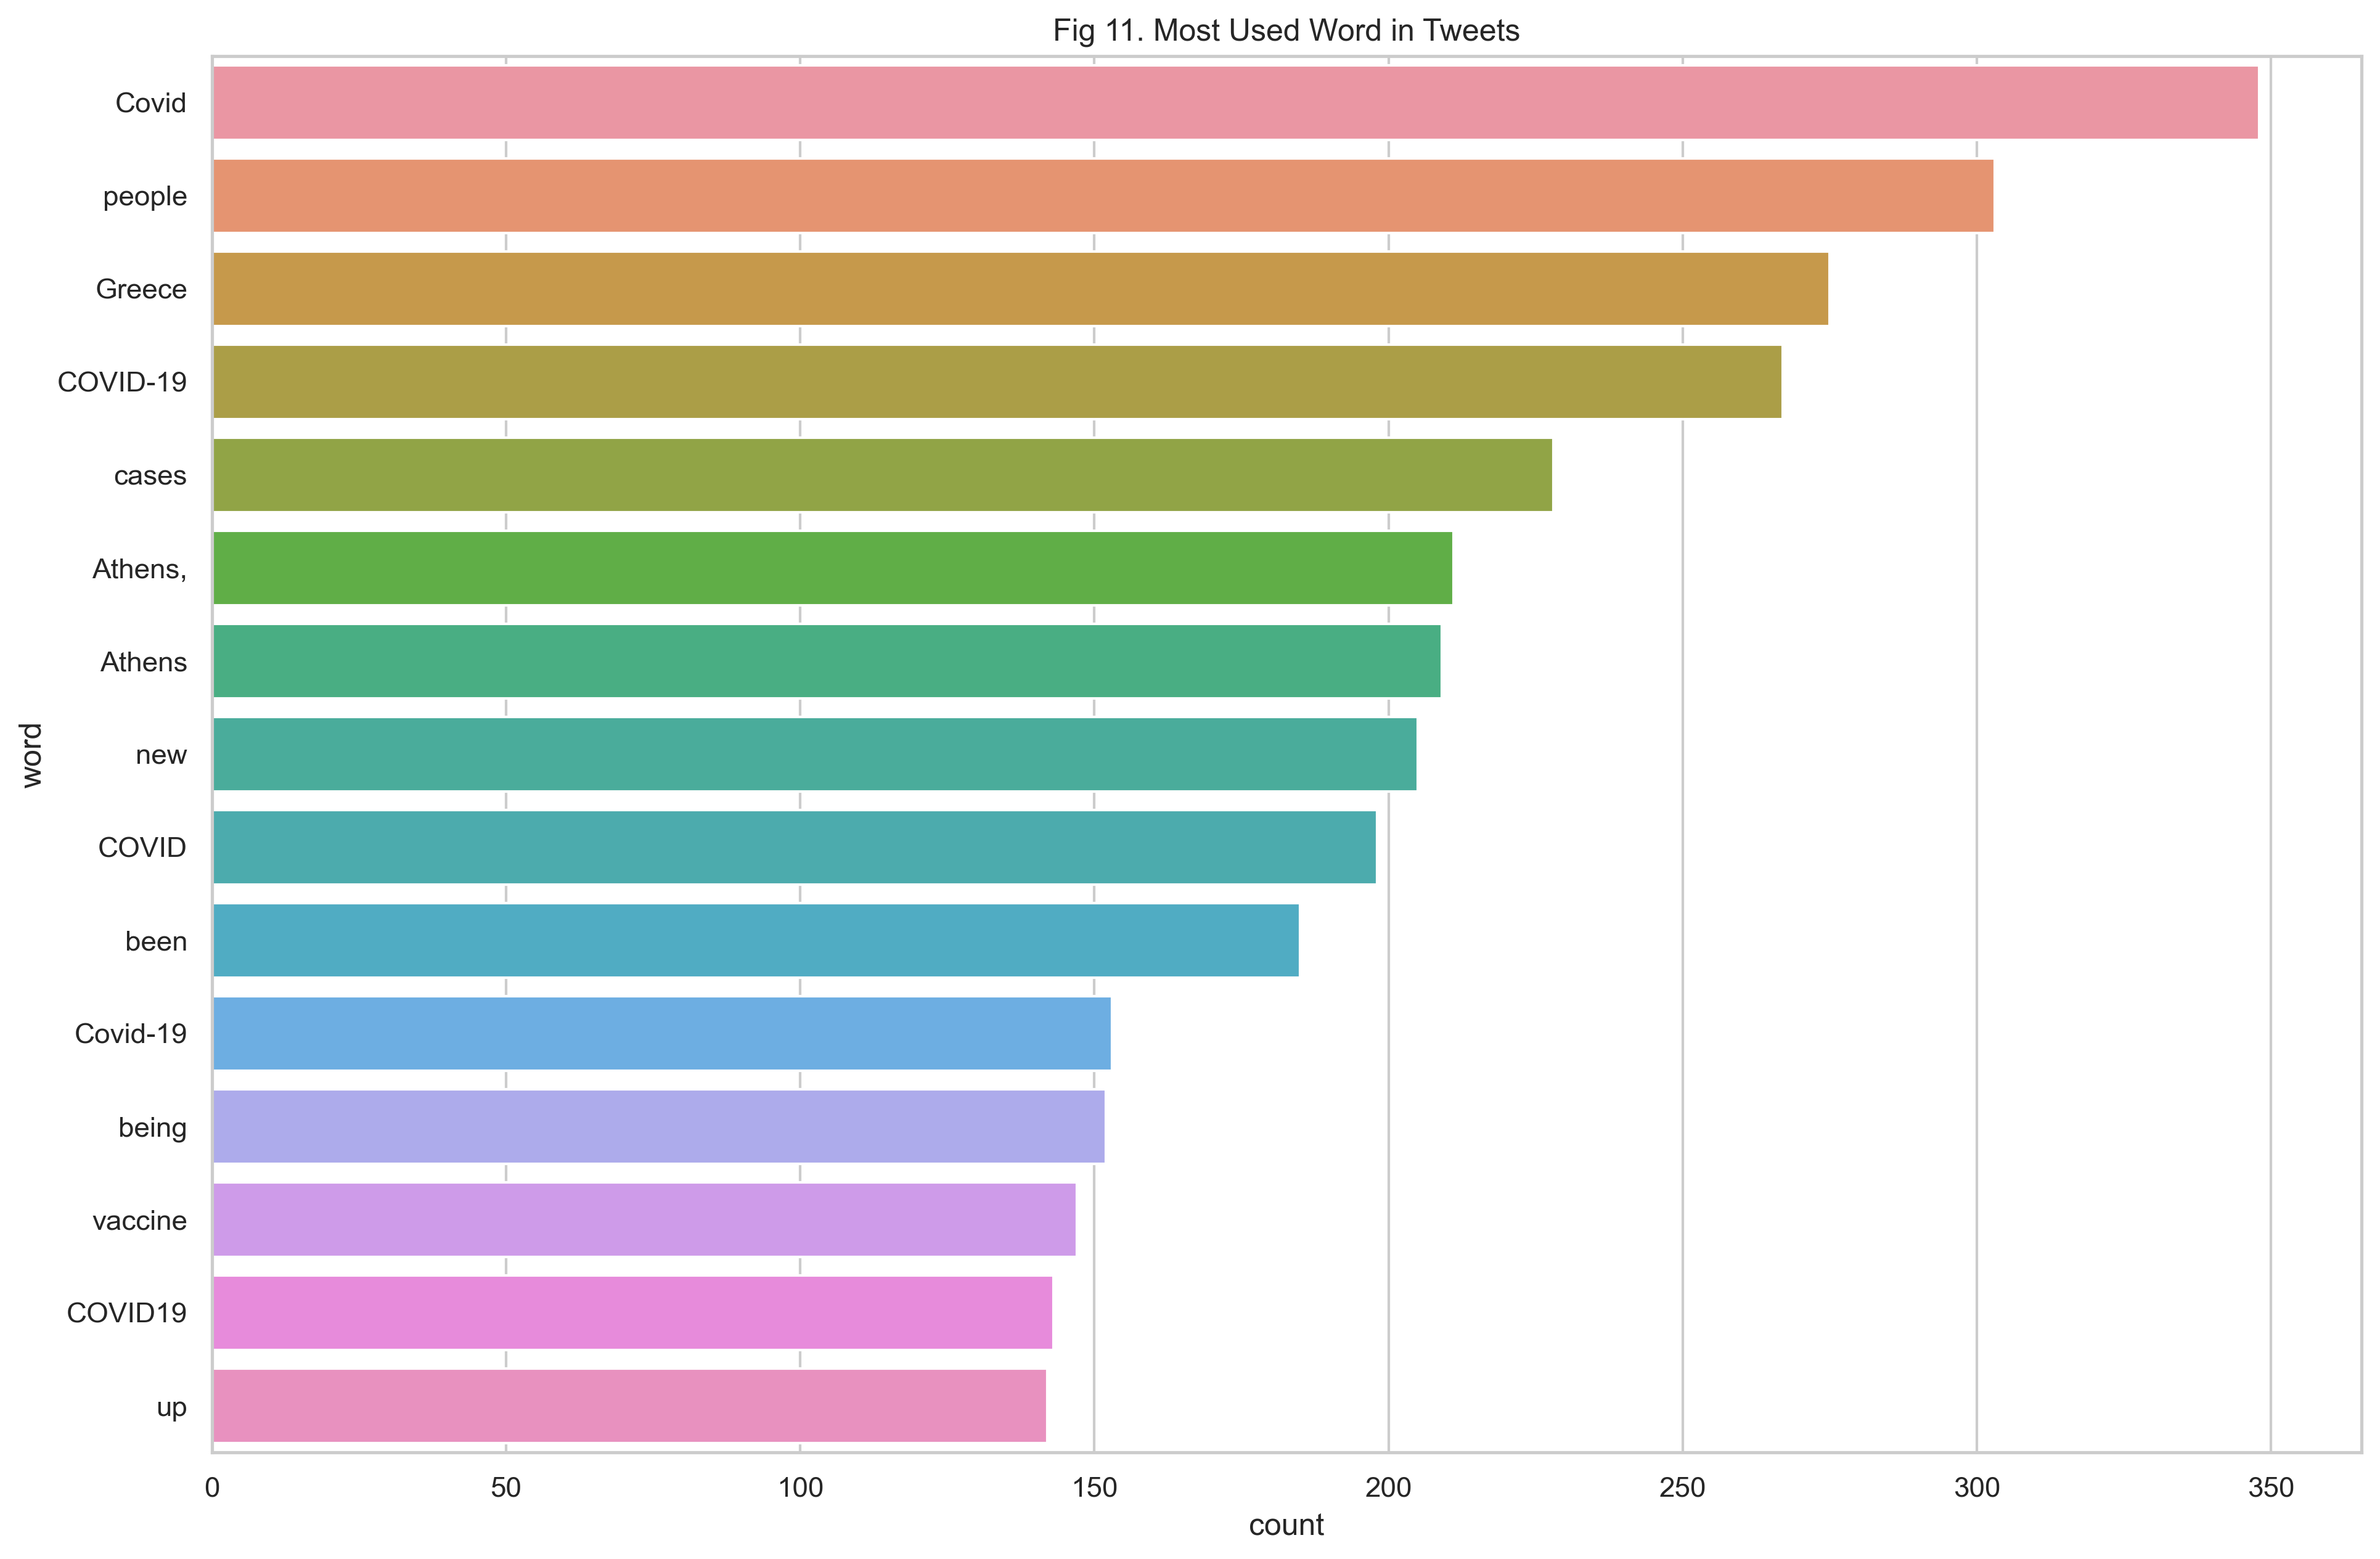

In [72]:
# Display the result as a horizontal barplot
ax = sns.barplot(x="count",
                 y="word",
                 data=data2)

# Add title to the chart
ax.set_title("Fig 11. Most Used Word in Tweets")

In [73]:
dft = pd.DataFrame(tweets_text_values)
dft.columns = ['Tweets']

In [74]:
# Create a subset of the dataframe containing only tweets with the identified keywords
subset = dft[dft['Tweets'].str.contains('Covid')]

# Loop through the dataframe and print each element
for i in subset.index:
    print("Tweet: ",i)
    print(subset.loc[i,"Tweets"],'\n')

Tweet:  7
Out of the hospital from DKA.. now I tested positive for Covid… why me #T1D #Diabetes #COVID19 

Tweet:  57
#IDFPodcast - Join host @not_defeated as she welcomes Drs. @gillianlbooth &amp; @pandoralucrezia for an in-depth discussion on the connections between #Covid19 and #diabetes. Listen on Spotify: https://t.co/04dXFAI1uj https://t.co/0sa99c4SAw 

Tweet:  60
“It took a while to convince me,” said Al-Aly, who directs the clinical epidemiology center at the Veterans Affairs St. Louis Health Care System in Missouri. “It was hard to believe that Covid could be doing this.”

#LongCovid #Diabetes 
 https://t.co/aZ5QOr5ao0 

Tweet:  61
Decoding the #COVID19 connection with diabetes #LongCovid 

https://t.co/pVDlI4RjgU 

Tweet:  68
#IDFPodcast - Join host @not_defeated as she welcomes Drs. @gillianlbooth &amp; @pandoralucrezia for an in-depth discussion on the connections between #Covid19 and #diabetes. Listen on Spotify: https://t.co/7s89RuR27M https://t.co/wQMWvlSCKl 

Tweet:  78

Tweet:  1058
Why do doctors keep asking if I've had a PCR? 
I can't *get* a PCR, people - the government changed that, in their infinite wisdom.
#COVID19 #CovidIsNotOver https://t.co/9jVtJ4tenl 

Tweet:  1059
Fast &amp; Accurate COVID-19 PCR Test. Your results in 24 hours or less. CLIA &amp; COLA Registered Lab → https://t.co/cLNJOME6Gq
#covid19testing #CovidTesting #irvine #lakeforest #OrangeCounty #tustin #pcrtest #travel #COVID19 #CovidIsNotOver #covidpcrtest https://t.co/TpKdT1nQnU 

Tweet:  1060
The world came to a pause during the last couple of years. Here's a poem voicing the thoughts and emotions of the poor during the pandemic.
#COVID19 #CovidIsNotOver #poem #blogging 
https://t.co/mOxd0K2ZWm 

Tweet:  1061
so I'm meeting with my #COVID #ContactTracer team for a picnic right now
they're all talking about how the schools have gone to utter shit as soon as mask mandates were removed
if you're exposed at school or at home daily, you're allowed at school 🥴
#CovidIsNotOver 

Tweet

Does someone want to update @GBNEWS. We have moved on from 
Covid
Ukraine
Cost of living crisis
Partygate
Brexit
Dinghy crossings

It’s monkeypox time now lads try and keep up with the narrative 🤦🏼‍♂️

#Brexit #CostOfLivingCrisis #Partygate #COVID19 https://t.co/QEOj3zBhnC 

Tweet:  1628
Despite a #Clouseau like #investigation #MetPoliceUK have identified the #Covid19 #Partygate #crime #hotspot. It's the base of a corrupt #criminal gang known as the #Tories, led by two nasty #villans known as the #oaf &amp; his sidekick the #fiddler. Do not approach or engage. https://t.co/AmDDVbdIzE 

Tweet:  1643
It’s astonishing isn’t it? A total of 126 fixed penalty notices for breaches of Covid-19 regulations have been handed out relating to eight parties, the Met said. #partygate #COVID19 

Tweet:  1644
We need you, Sue Gray! #SueGrayReport #SueGrayReportNow #CostOfLivingCrisis #inflation #partygate #OneRuleForThem #NotMovingOn #ToriesPartiedWhilePeopleDied #JohnsonOut115 #ToryCriminals #ToryCovi

## 6) Assignment activity 6: 

### 6.1) Report expectations:
- Demonstrate using external function and interpret results.
- Note observations.

### 6.2) Presentation expectations:
- **Question 1**: We have heard of both qualitative and quantitative data from the previous consultant. What are the differences between the two? Should we use only one or both of these types of data and why? How can these be used in business predictions? Could you provide examples of each?
- **Question 2**: We have also heard a bit about the need for continuous improvement. Why should this be implemented, it seems like a waste of time. Why can’t we just implement the current project as it stands and move on to other pressing matters?
- **Question 3**: As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Have we covered everything from a data ethics standpoint? Is there anything else we need to implement from a data ethics perspective? 

### Week 6 Notes & Observations:
**Answer 1**: 
Quantitative data are information about numeric variables. In contrast, qualitative data are data that cannot be counted, measured or readily expressed using figures. It is the descriptive and conceptual findings usually collected through questionnaires, interviews, or observation.

Both quantitative and qualitative data are used in business predictions. Quantitative forecasting make use of the exact numbers and predict based on the identified patterns. Whereas qualitative forecasting make the prediction based on emotions, ideas and judgements instead of numbers. Qualitative prediction allows more interpretation comparing with quantitative prediction and can communicate concept that numbers don't capture. However, it is easy to include personal bias when it comes to qualitative predictions. 

In our example, Twitter data will be considered to be qualitative data while the COVID-19 cases data will be considered to be quantitative data.

**Answer 2**:
Continuous improvement is vital because we can review and make necessary change to adapt and optimise the effectiveness and outcome based on the change in situation. Most of the projects and works would experienced a learning period and testing is essential to achieve the best result. Hence, continuous improvement is needed to ensure we are doing things in the most efficient and effective way.

**Answer 3**:
Data ethics are the guideline that should be followed by every business to ensure that privacy, security, and transparency standards are met because it establish a baseline of trust between the business and users. In our case, only share the data to restricted party is the data ethics and ensure users know how their data is being used are two of the most important data ethics that should be applied. 

In [75]:
# Create a sample dataframe to review the dataset
sample = cases[['Province/State','Date','Hospitalised']]

In [76]:
# Select data for Channel Islands
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

In [77]:
# View the sample_ci dataframe

print(sample_ci.dtypes)
sample_ci.head()

Province/State     object
Date               object
Hospitalised      float64
dtype: object


Province/State        Date  Hospitalised
2528  Channel Islands  2020-01-22             0
2529  Channel Islands  2020-01-23             0
2530  Channel Islands  2020-01-24             0
2531  Channel Islands  2020-01-25             0
2532  Channel Islands  2020-01-26             0

In [78]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [79]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

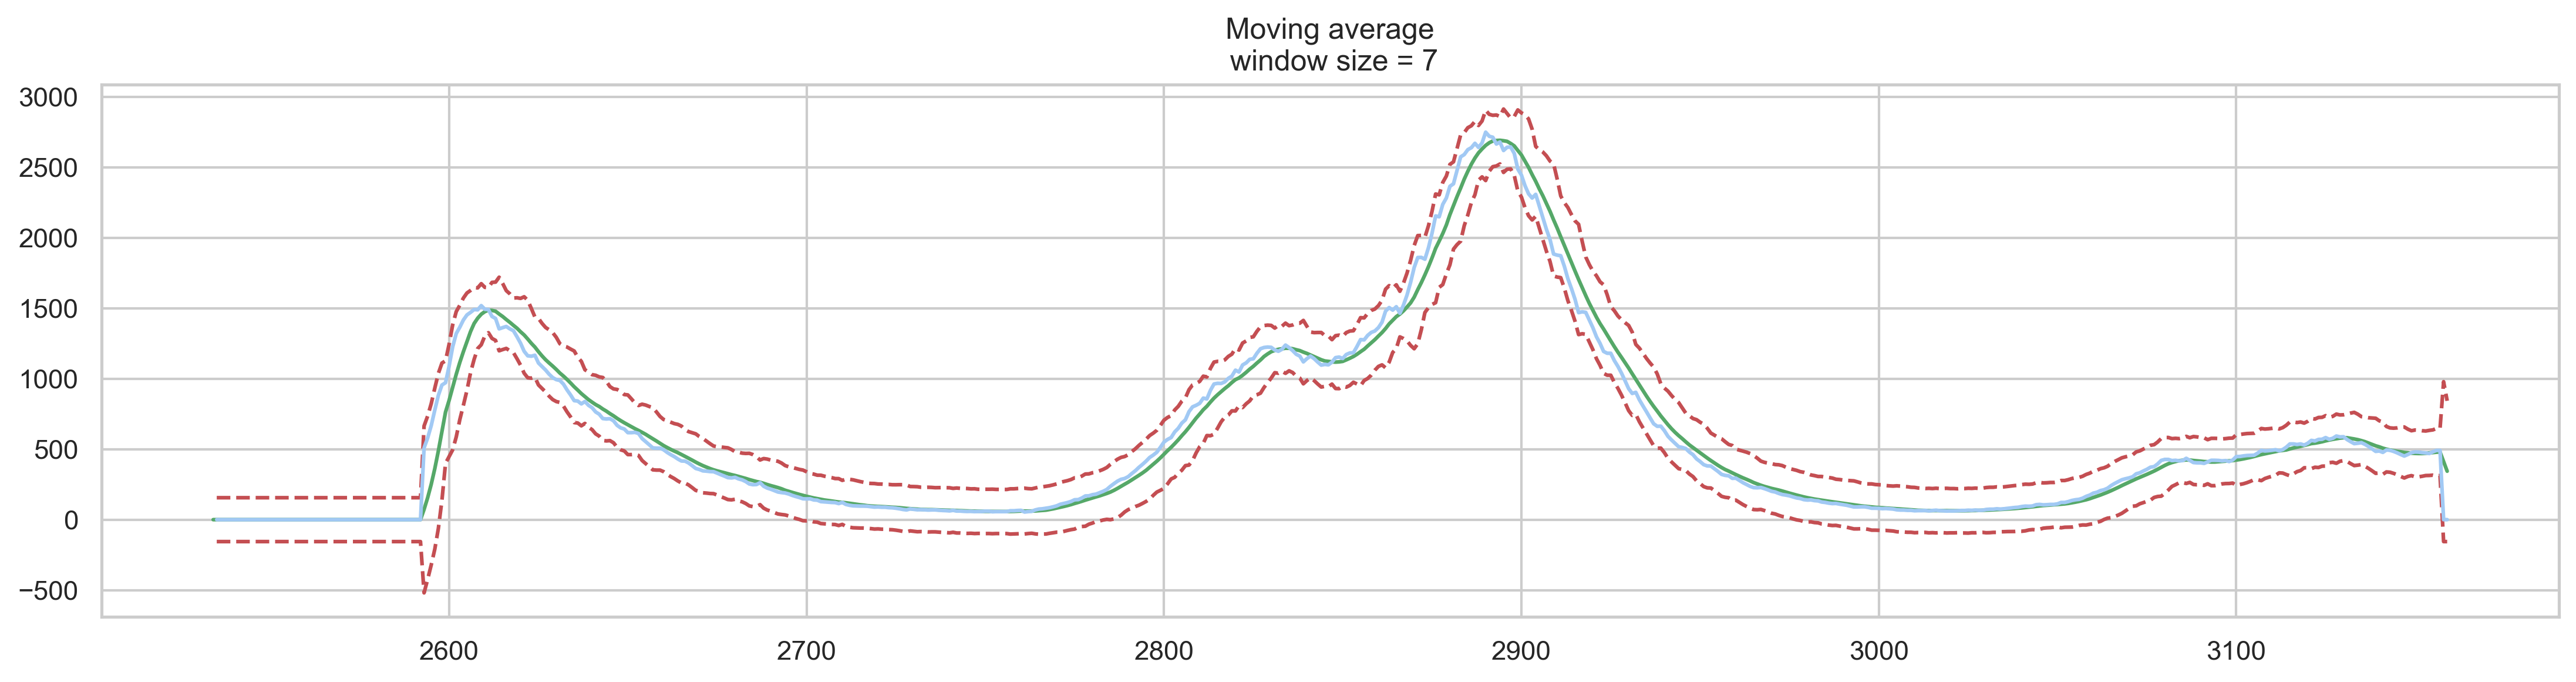

In [80]:
# Use the plot moving average function for Channel Islands with a 7 days window
plot_moving_average(sample_ci['Hospitalised'], 7, plot_intervals=True)

In [81]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

Province/State        Date  Hospitalised  error
2593  Channel Islands  2020-03-27           509    436
2594  Channel Islands  2020-03-28           579    424
2595  Channel Islands  2020-03-29           667    416